                                     SistersLab Bitirme Projesi - Başak Dilara Çevik 

***

*1-) Kullanılan Kütüphaneler ve Modüller*

*2-) Veri Seti ve Değişkenler*

*3-) Dosyanın Hazır Hale Getirilmesi*

*4-) Veri Ön İşleme*

*5-) Ülkelere göre çekilen film sayısı*

*6-) Aktörlerin oynadığı film sayısı*   

*7-) Aktörlerin oynadığı film türleri* 

*8-) Ülkelere göre hangi tür filmlerin çekilmiş?*

*9-) Türe göre kadın-erkek aktör sayısı*

*10-) Ülkelere göre puanlar*

*11-) Türlere göre puanlar*

*12-) Puan ve Oylama Miktarlarına Göre Filmlerin İncelenmesi*

*13-) Film Arama Motoru* 

*14-) Oluşturulmuş metriklere göre analizler*  
***


**1-) Kullanılan Kütüphaneler ve Modüller**

In [254]:
import patoolib
import pandas as pd
import missingno as msgn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display


* patoliib: Patool tarafından çeşitli arşiv formatları oluşturulabilir, ayıklanabilir, test edilebilir, listelenebilir, aranabilir, karşılaştırılabilir ve yeniden paketlenebilir. 
* pandas: pandas, hızlı, güçlü, esnek ve kullanımı kolay, Python programlama dili üzerine inşa edilen bir açık kaynak veri analizi ve işleme aracıdır.
* missingno:  Eksik verileri tanımlamak ve görselleştirmek için bir kütüphanedir.
* numpy: (*Numerical Python*) Çok boyutlu dizilerle ve matrislerle çalışmamızı sağlayan ve matematiksel işlemler yapabileceğimiz Python dili kütüphanesidir.
* matplotlib: Matplotlib, Python'da statik, animasyonlu ve etkileşimli görselleştirmeler oluşturmak için kapsamlı bir kitaplıktır. 
* seaborn: Seaborn, matplotlib tabanlı bir Python veri görselleştirme kitaplığıdır. Çekici ve bilgilendirici istatistiksel grafikler çizmek için üst düzey bir arayüz sağlar.
* re: Bu modül, Perl programlama dilinde bulunanlara benzer düzenli ifade eşleştirme işlemleri sağlar.
* os: Bu modül, işletim sistemine bağlı işlevselliği kullanmanın taşınabilir bir yolunu sağlar.
* sklearn: Tahmine dayalı veri analizi için basit ve verimli araçlar sağlayan bir kütüphanedir.
* ipywidgets:Jupyter Widgets Jupyter not defterleri için etkileşimli tarayıcı kontrolleridir.


******************************************************

**2-) Veri Seti ve Değişkenler**

***************************************************************************************

Filmler kategorisinde 8 adet ayrı veri seti bulunmaktadır.

__rating.csv__ (1)

* *rank:* Filmin puanını göstermektedir.

* *votes:* Filmin aldığı oy sayısını göstermektedir.

* *distribution:* Oyların dağılımını göstermektedir.

__prodcompanies.csv__ (2)

* *movieid:* Filmlere ait benzersiz kodu ifade etmektedir.

* *name:* Filmi üreten şirketin adını ifade etmektedir.

__movies2actors.csv__ (3)

* *movieid:* Filmlere ait benzersiz kodu ifade etmektedir.

* *actorid:* Aktörlere ait benzersiz kodu ifade etmektedir.

* *as_character:* Oyuncunun hangi karakter rolünde oynadığını göstermektedir.

* *leading:* Roller sırasında kaçıncı sırada olduğunu ifade etmektedir.

__movies.csv__ (4)

* *movieid:* Filmlere ait benzersiz kodu ifade etmektedir.

* *title:* Filmlerin başlığını yani ismini ifade etmektedir.

* *year:* Filmin yayınlandığı yılı ifade etmektedir.

__languages.csv__ (5)

* *movieid:* Filmlere ait benzersiz kodu ifade etmektedir.

* *language:* Filmin hangi dillere uyarlandığını ifade etmektedir.

__genres.csv__ (6)

* *movieid*: Filmlere ait benzersiz kodu ifade etmektedir.

* *genre*: Filmin türünü ifade etmektedir.

__countries.csv__ (7)

* *movieid:* Filmlere ait benzersiz kodu ifade etmektedir.

* *country:* Filmi yapan ülkeyi ifade etmektedir.

__actors.csv__ (8)

* *actorid:* Aktörlere ait benzersiz kodu ifade etmektedir.

* *name:* Aktörlerin adını ve soyadını göstermektedir.

* *sex:* Aktörlerin cinsiyetini göstermektedir.

*******************************************************************************************

**2-) Dosyanın Hazır Hale Getirilmesi**

******************************************************

Patool aracılığıyla dosyamızı zipten çıkaralım.

In [165]:

patoolib.extract_archive("movies_dataset.zip", outdir=".")

patool: Extracting movies_dataset.zip ...
patool: running D:\7-Zip\7z.EXE x -o. -- movies_dataset.zip
patool: ... movies_dataset.zip extracted to `.'.


'.'

Çıkan dosyalarımızın isimlerini değiştirelim ve düzenli bir hale getirelim.

In [255]:
folder = r'movies_dataset/'
count = 1
# count increase by 1 in each iteration
# iterate all files from a directory
for file_name in os.listdir(folder):
    try:
    # Construct old file name
        source = folder + file_name

    # Adding the count to the new file name and extension
        destination = folder + "movies_" + str(count) + ".csv"

    # Renaming the file
        os.rename(source, destination)
        count += 1
    except:
        pass
print('Tüm dosyaların isimleri değiştirildi.')

print('Yeni isimler: ')
# verify the result
res = os.listdir(folder)
print(res)
#Veri setlerini okuma
for i in range(1, 9):
    globals()['df{}'.format(i)] = pd.read_csv('movies_dataset/movies_{}.csv'.format(i), encoding='utf-8', on_bad_lines='warn')


df1
    

Tüm dosyaların isimleri değiştirildi.
Yeni isimler: 
['movies_1.csv', 'movies_2.csv', 'movies_3.csv', 'movies_4.csv', 'movies_5.csv', 'movies_6.csv', 'movies_7.csv', 'movies_8.csv']


b'Skipping line 16932: expected 4 fields, saw 5\nSkipping line 16933: expected 4 fields, saw 5\nSkipping line 16943: expected 4 fields, saw 5\nSkipping line 16948: expected 4 fields, saw 5\nSkipping line 36078: expected 4 fields, saw 5\nSkipping line 36086: expected 4 fields, saw 6\nSkipping line 39517: expected 4 fields, saw 5\n'


,actorid,name,sex
0,4,"$hort, Too",M
1,16,"'Bear'Boyd, Steven",M
...,...,...,...
98688,2749377,"Örnólfsdóttir, Álfrún",F
98689,2749386,"Öss, Eniko",F


******************************************************

**3-) Veri Ön İşleme**

******************************************************

In [256]:
#Veri setlerini birleştirme
film_butunu = pd.merge(df2, df3, how='left').merge(df4, how='left').merge(df5, how='left').merge(df6, how='left').merge(df7, how='left').merge(df8, how='left')

oyuncular_butunu = pd.merge(df1, df6, how='left')

oyuncular = oyuncular_butunu.groupby("movieid").agg({'actorid': 'first', "name": list, "sex": "first"})

oyuncular = oyuncular.rename(columns={ 'actorid': 'oyuncu_kodu', "name": "isim", "sex" : "cinsiyet"})

#Film id'sine göre verileri gruplama
film = film_butunu.groupby('movieid').agg({'title': 'first', 'country': 'first', 'genre': 'first', 'actorid': list, 'language': list,
 'rank': 'first', 'votes' : 'mean', 'year': 'first', 'leading': 'first', 'name': list, 'distribution': 'first'})

oyuncular_ayrik = film['name']. explode(). reset_index(). rename(columns={ 'name': 'oyuncu_adi'})


film = film.rename(columns={ 'title': 'baslik', 
                            'country': 'ulke', 
                            'genre': 'tur',
                            'actorid': 'oyuncu_kodu',
                            'language': 'dil',
                            'rank': 'puan', 
                            'votes' : 'oy_sayisi',
                            'year': 'yil', 
                            'leading': 'basrol',
                            'name': 'sirket_adi'})



oyuncular.shape

(3798, 3)

In [257]:
film.head()

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,distribution
movieid,,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,"[7 Network [au], Australian Film Commission, T...",0000001222
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,"[Paramount Pictures [us], Rimfire Films [au], ...",0001221000
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,"[Lakeshore Entertainment [us], Paramount Pictu...",0011110000
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,"[Aaron Spelling Productions [us], Blackbird Pr...",0000001212
1672946,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",NaN,NaN,2014,2.0,"[Grindhouse Films [us], Grindhouse Films [us],...",None


Aslında çok ayrıntılı bir şekilde veri seti hakkında bilgi edinmemiz mümkün. Ancak bitirme projesi gereği bunlar ayrıca incelenecektir.

In [258]:
#from pandas_profiling import ProfileReport
#profil = ProfileReport(film, title="Pandas Raporu")
#profil

Tür, puan, oy sayısı, başrol ve dağılımda eksik veriler görüyoruz.

<AxesSubplot:>

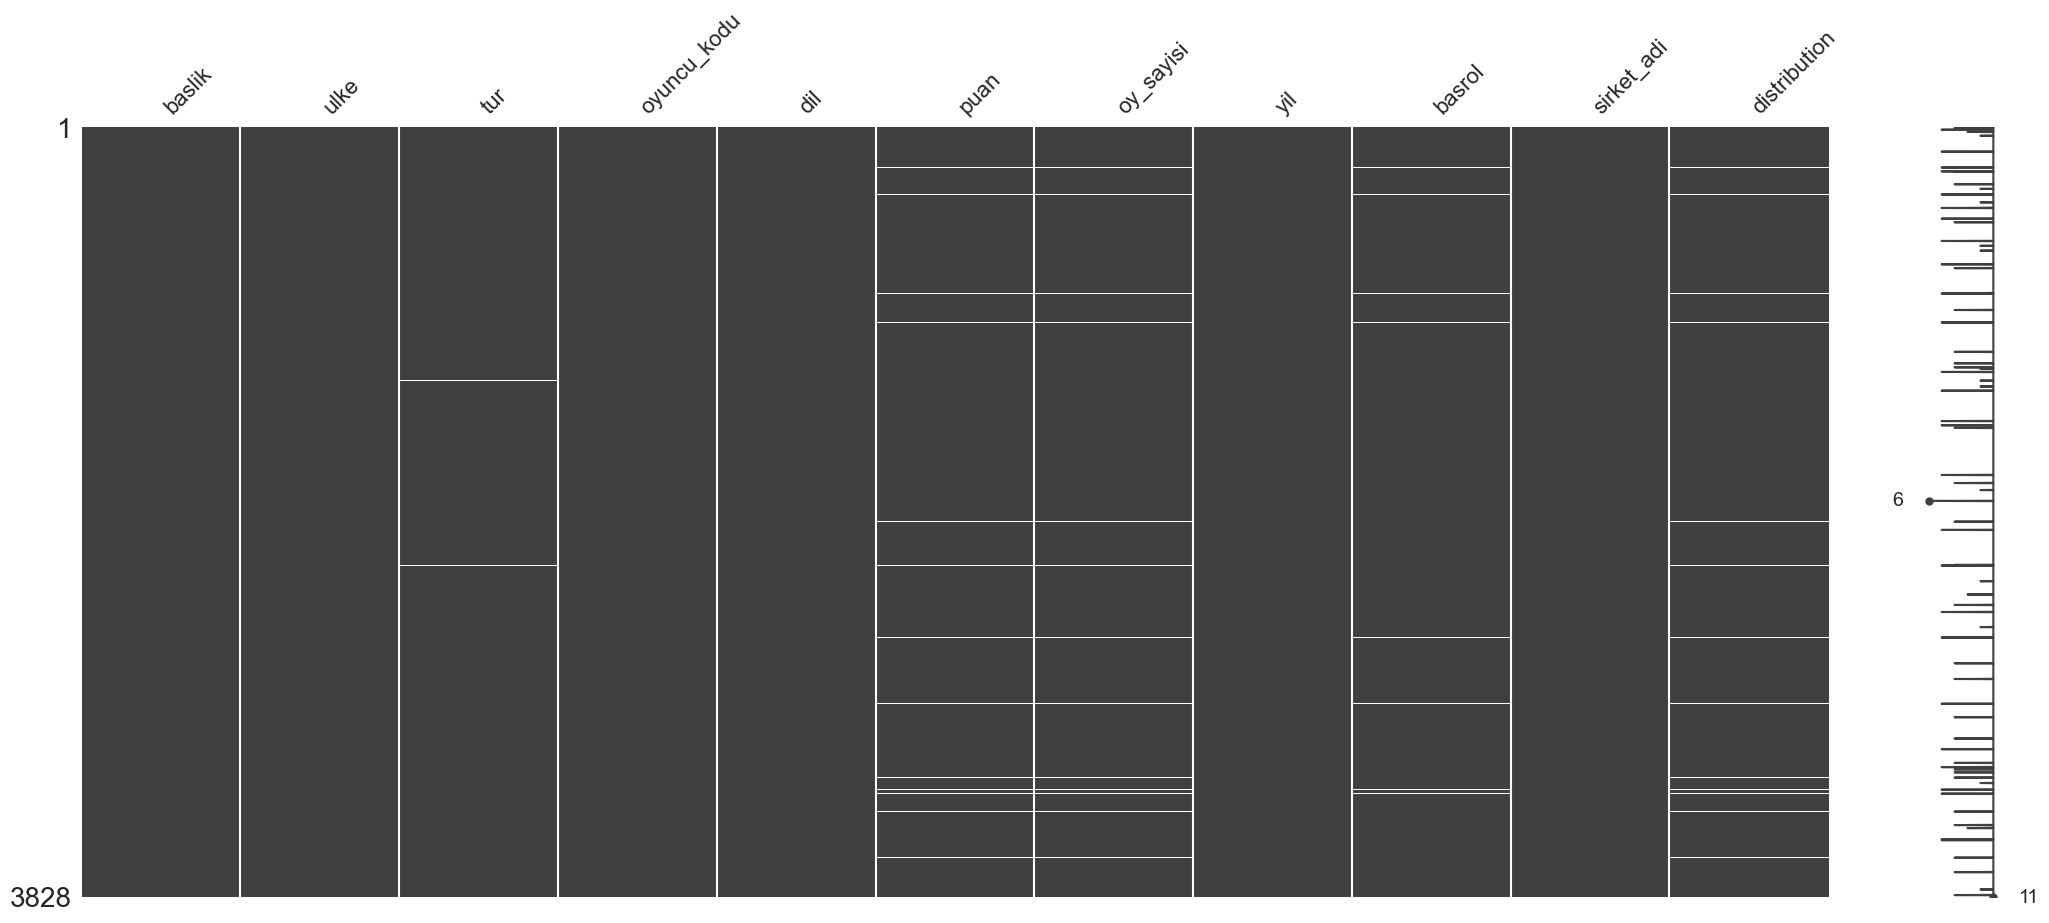

In [259]:

msgn.matrix(film)

Dendogram kullanarak kayıp veriler arasında bir bağlantı olup olmadığını inceleyebiliriz. *Clustering* kullanarak kayıp veriler inceleniyor.

Dağılım ve puan arasındaki kayıp verilerde büyük bir benzerlik var. Tür ve yıl arasındaki kayıp verilerde yine benzerlik var lakin daha az. 

<AxesSubplot:>

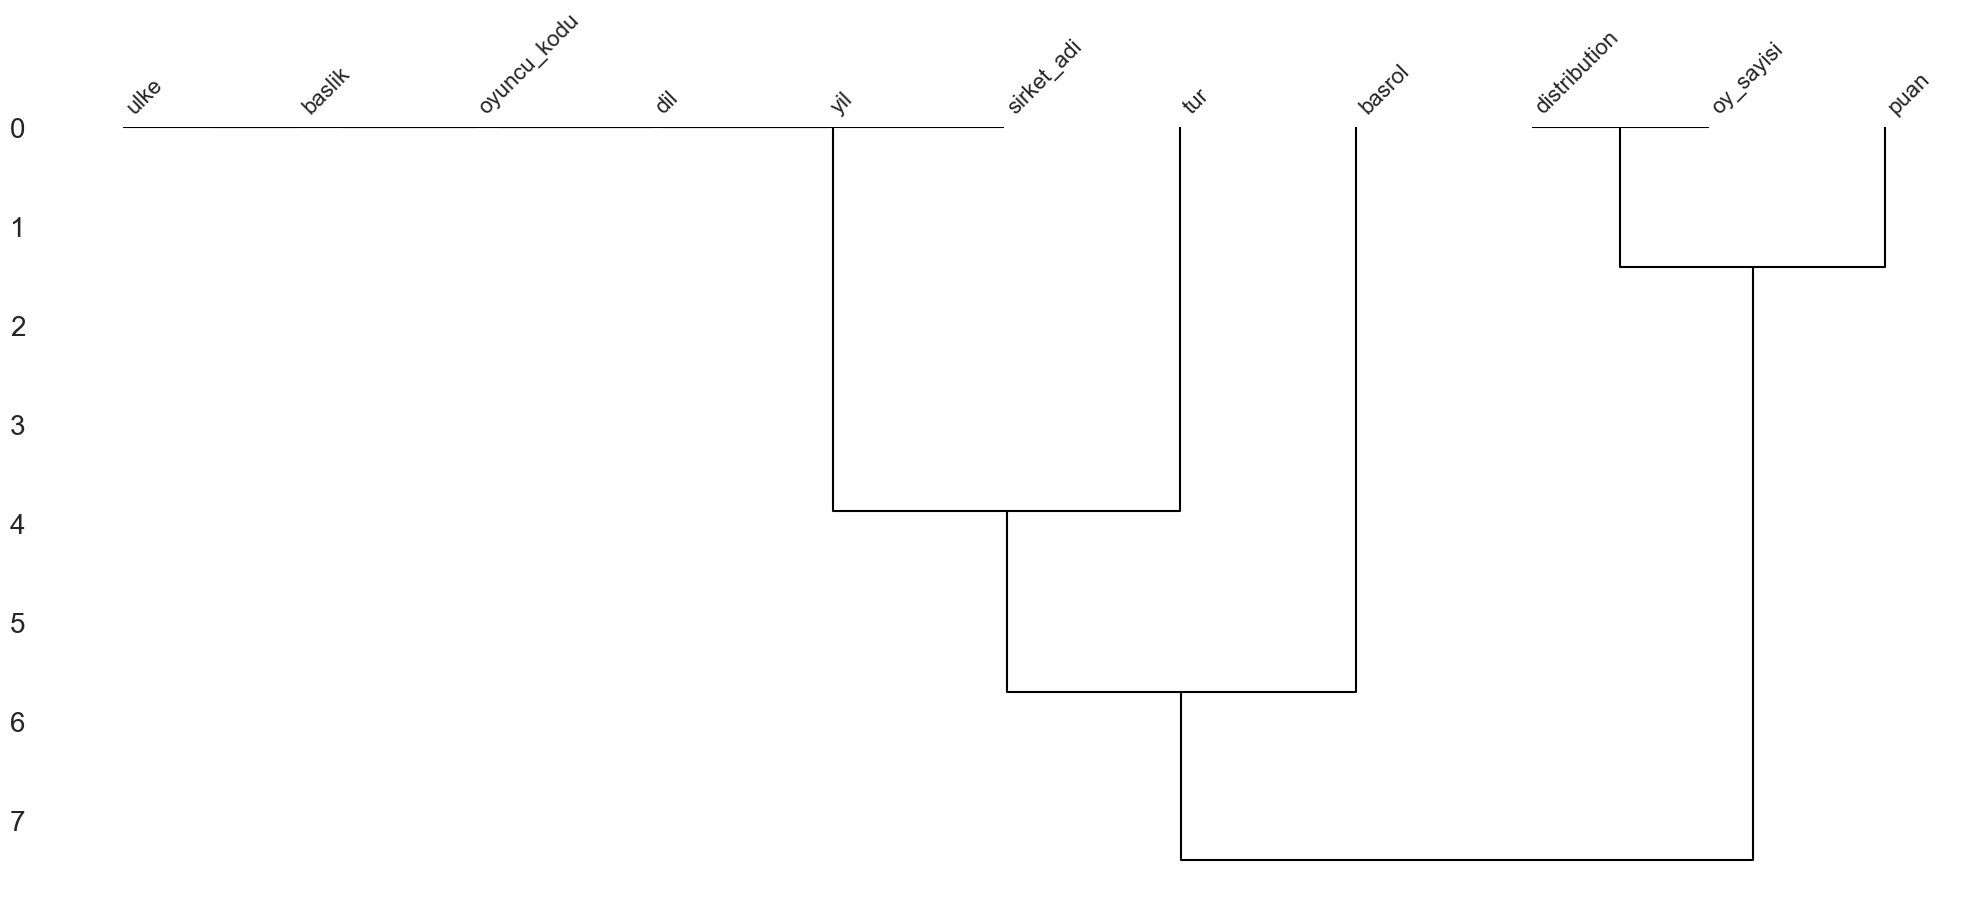

In [260]:

msgn.dendrogram(film)

Zaten inceledik ancak sayısal olarak görmek için bir tablo oluşturabiliriz.

In [261]:
def eksik_verilerim(df):
    eksik_veriler = df.isnull().sum()
    eksik_veriler_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_veriler_tablo = pd.concat([eksik_veriler, eksik_veriler_yuzde], axis=1)
    eksik_veriler_tablo_sonuc = eksik_veriler_tablo.rename(
    columns = {0 : 'Eksik Verilerin Sayısı', 1 : '% Değeri'})
    return eksik_veriler_tablo_sonuc

eksik_verilerim(film)   

,Eksik Verilerin Sayısı,% Değeri
baslik,0,0.000000
ulke,0,0.000000
...,...,...
sirket_adi,0,0.000000
distribution,57,1.489028


Boş verileri silmek çok fazla veri kaybına neden olacağı için boş verileri 0 değeri ile değiştirmeyi tercih ettim.

In [262]:

film = film.fillna("0")


eksik_verilerim(film)


,Eksik Verilerin Sayısı,% Değeri
baslik,0,0.0
ulke,0,0.0
...,...,...
sirket_adi,0,0.0
distribution,0,0.0


Ancak oyuncular veri setinde böyle bir sıkıntı yok dolayısıyla drop yapabilirim. Zaten bu veri setini doğrudan çok kullanmayacağım.

In [263]:
oyuncular = oyuncular.dropna()
eksik_verilerim(oyuncular)

,Eksik Verilerin Sayısı,% Değeri
oyuncu_kodu,0,0.0
isim,0,0.0
cinsiyet,0,0.0


In [264]:
film.shape

(3828, 11)

In [265]:
oyuncular.shape

(3798, 3)

In [266]:
#Sütunların dağılımı
film.describe().T


,count,mean,std,min,25%,50%,75%,max
yil,3828.0,1985.36442,18.176059,1898.0,1981.0,1994.0,1997.0,2014.0


In [267]:
oyuncular.describe().T

,count,mean,std,min,25%,50%,75%,max
oyuncu_kodu,3798.0,127591.18931,207430.01525,4.0,30503.0,70215.5,148618.0,2579564.0


**4-) Ülkelere göre çekilen film sayısı**

**Yıllara göre film sayısı ve görselleştirilmesi**

Özellikle 1980 yıllarından başlayarak 2000 yılına kadar film sayılarında ciddi bir artış olduğunu görüyoruz. Bu veri seti özellikle 1980-2000 yılları arasında çekilen filmleri analiz etmek için ideal bir set.

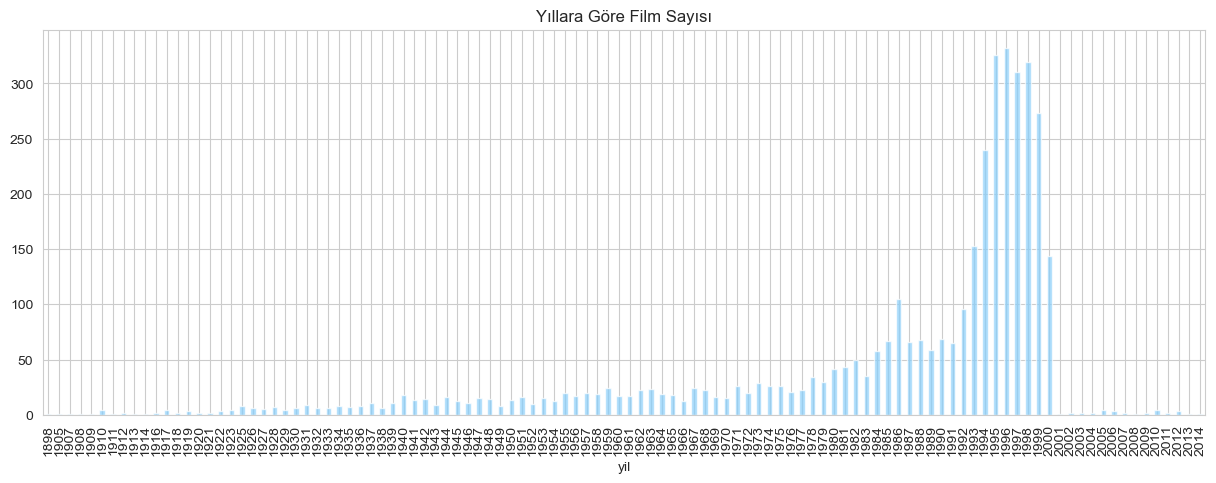

In [268]:
film.groupby('yil').count()['baslik'].plot(kind='bar', figsize=(15,5), color='lightskyblue', fontsize=10, title='Yıllara Göre Film Sayısı', alpha=0.7,
grid=True);


******************************************************

**Ülkelere göre film sayısı**

******************************************************

USA için epey bir farkla film sayısı görüyoruz. Daha sonra UK, Fransa, Kanada ve Almanya'nın en çok filme sahip olduğunu görüyoruz.

* Kolayca gruplara ayırabilmek için fonksiyon tanımlayalım.

In [269]:
def gruplama(df, kolon):
    return df.groupby(kolon).size().sort_values(ascending=False)

gruplama(film, 'ulke')


ulke
USA                      2500
UK                        368
                         ... 
Republic of Macedonia       1
Algeria                     1
Length: 53, dtype: int64

Şimdi görselleştirelim. USA, UK, Fransa, Almanya ve Kanada dışındaki ülkelerde çekilen filmlerin sayısı neredeyse hiç belli olmuyor.

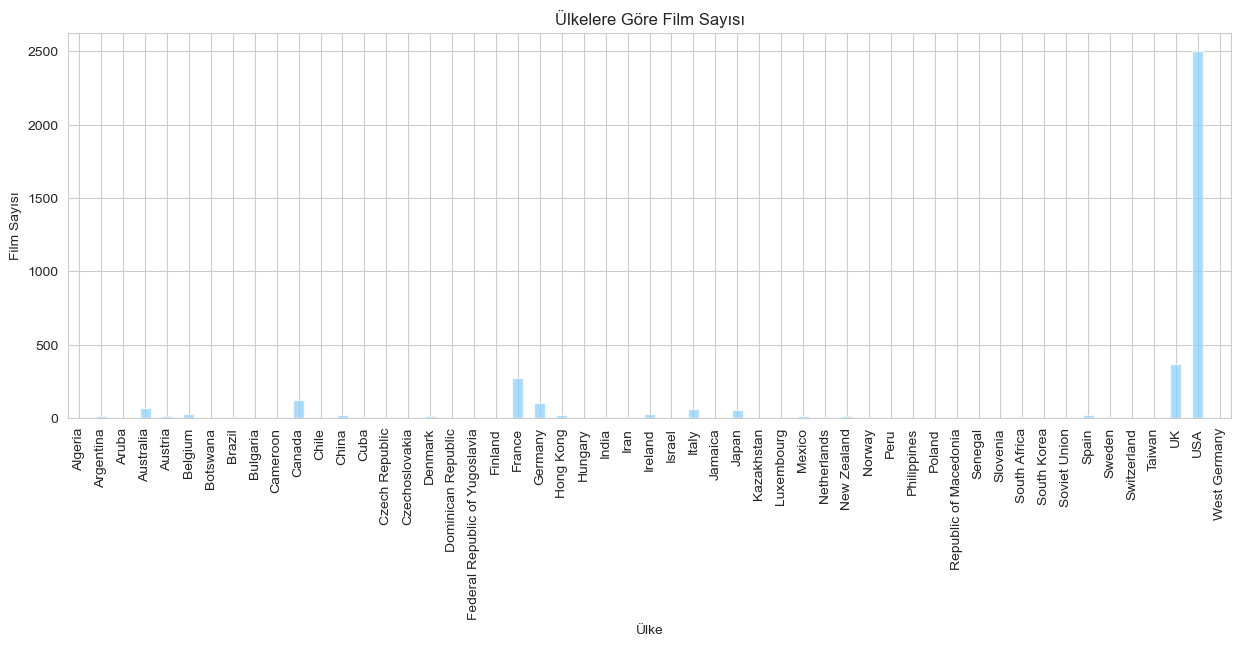

In [270]:
film.groupby('ulke').count()['baslik'].plot(kind='bar', figsize=(15,5), color='lightskyblue', fontsize=10, title='Ülkelere Göre Film Sayısı', alpha=0.7, xlabel='Ülke',
 ylabel='Film Sayısı', grid=True);


Yukarıda tüm ülkeler var ve dolayısıyla takip etmesi zor. İlk 10 ülkeye bakalım.

Az önce bahsettiğimiz ülkeri daha net ve sade bir şekilde görmemiz mümkün.

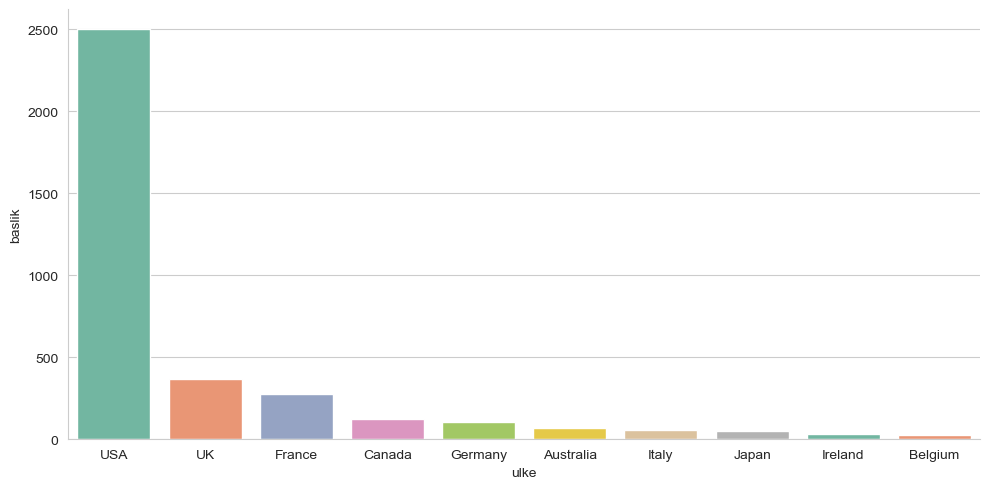

In [271]:
#Ülkelere göre film sayısını catplot ile gösterme

#en fazla oynanan ilk 10 ülkeyi seçme
ulke_tur = film.groupby('ulke').count()['baslik'].sort_values(ascending=False).head(10)
catplot = sns.catplot(x='ulke', y='baslik', data=ulke_tur.reset_index(), kind='bar', height=5, aspect=2, palette='Set2')

* Scatter çizmek için fonksiyon tanımlayalım.

Filmlerin ve yılların dağılımını görebiliyoruz. USA için geçmişten gelen bir veri var, diğer ülkeler için bu kayıt düzgün tutulmamış olabilir veya diğer ülkelerde bu dönemlerde film üretilmemiş olabilir.

Özellikle küçük ülkelerden çok az filmin, sadece son dönemlerde veri setine dahil edildiğini gözlemliyoruz.

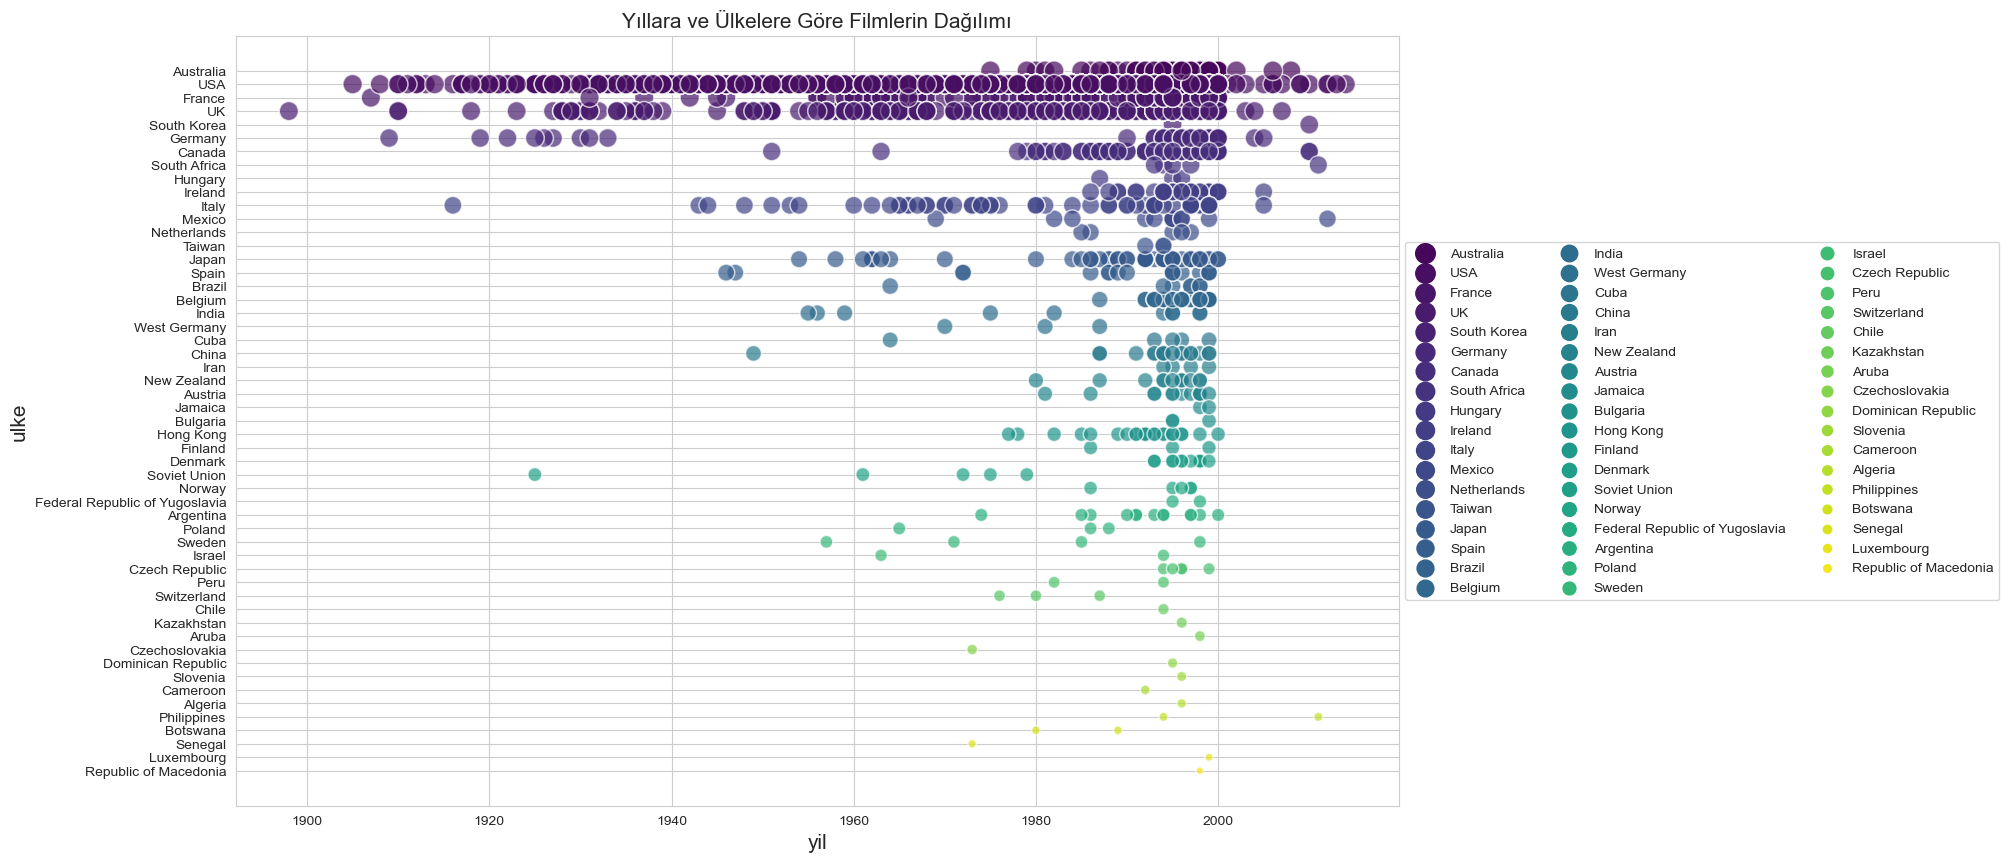

In [272]:
#yıllara ve ülkeye göre scatter plot



def scatter_ciz(x, y, data, hue, size, sizes, alpha, palette, title):
    plt.figure(figsize=(15,10))
    g = sns.scatterplot(x=x, y=y, data=data, hue=hue, size=size, sizes=sizes, alpha=alpha, palette=palette)
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
    g.set_xlabel(x, fontsize=15)
    g.set_ylabel(y, fontsize=15)
    plt.title(title, fontsize=15)
    plt.show()

scatter_ciz('yil', 'ulke', film, 'ulke', 'ulke', (30, 200), 0.7, 'viridis', 'Yıllara ve Ülkelere Göre Filmlerin Dağılımı')




In [273]:
%matplotlib inline

*  Pie-chart için bir fonksiyon tanımlayalım.

In [274]:

def ilk_10_ciz(x, y, title):
    
    colors = ['lightskyblue', 'lightcoral', 'yellowgreen', 'gold', 'lightblue', 'pink', 'lightgreen', 'orange', 'lightyellow', 'lightpink']
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors=colors, shadow = True, startangle=90, radius=1.2, rotatelabels = True, textprops=dict(color="green"), 
    wedgeprops = { 'linewidth' :0.9, 'edgecolor' : 'white' }, labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)])
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

    plt.axis('equal')
    plt.text(0, 0, title, fontsize=20, color='black', horizontalalignment='center', verticalalignment='center')




Pie-chart'ın büyük bir kısmını USA'in kapladığını görüyoruz.

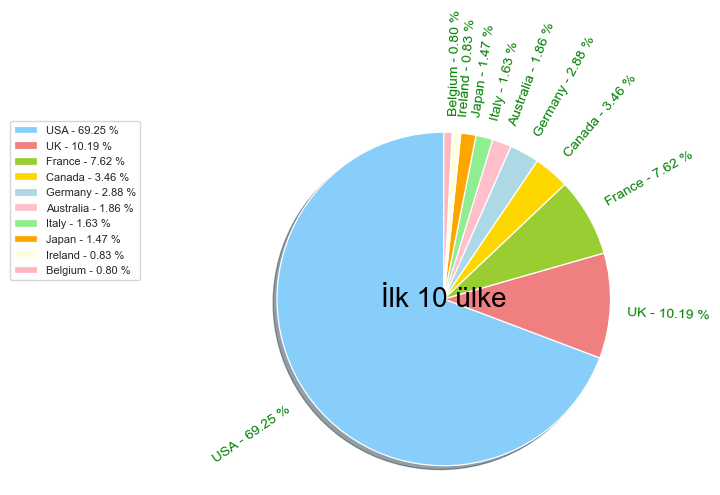

In [275]:
film_ulke = film.groupby('ulke').count()['baslik'].sort_values(ascending=False).head(10)
x = film_ulke.sort_values(ascending=False).head(10).index
y = film_ulke.sort_values(ascending=False).head(10).values
ilk_10_ciz(x, y, 'İlk 10 ülke')
plt.savefig('Proje Çıktıları/filmlerin_ulkelere_gore_dagilimi.png', bbox_inches='tight', dpi=600, transparent=True)

Ya bu veri setinde USA için eksiksiz kayıt tutulmuş ya da USA diğer ülkelere nazaran daha fazla film çekiyor diyebiliriz.

******************************************************

**5-) Aktörlerin oynadığı film sayısı**

******************************************************

Öneceki veri setimiz oyuncuları doğrudan dahil etmediği için bu analize uygun değil, o yüzden önceden oluşturduğumuz *oyuncular_butunu* veri setini kullanalım

In [276]:
oyuncular_butunu

,actorid,name,sex,movieid,as_character,leading
0,4,"$hort, Too",M,1722174.0,[Too $hort],0.0
1,4,"$hort, Too",M,2168402.0,[Lew-Loc] <27>,27.0
...,...,...,...,...,...,...
152337,2749377,"Örnólfsdóttir, Álfrún",F,2593112.0,[Screaming girl] <20>,20.0
152338,2749386,"Öss, Eniko",F,1890522.0,(as Eniko Oss) [Sister Sylva] <20>,20.0


Frank Welker, Samuel L. Jackson, Rober De Niro, M. Emmet Walsh, Whoopi Goldberg'in ilk sıraları paylaştığını görüyoruz.


In [277]:
def sayisini_bul(df, kolon):
    return df.groupby(kolon).size().sort_values(ascending=False)

oyuncu_film_sayisi = sayisini_bul(oyuncular_butunu, "name")
oyuncu_film_sayisi

name
Welker, Frank         51
Jackson, Samuel L.    36
                      ..
Hamlick, Angelique     1
Überzone               1
Length: 98686, dtype: int64

* En çok filmde oynayan ilk 10 oyuncuyu çizmek için:

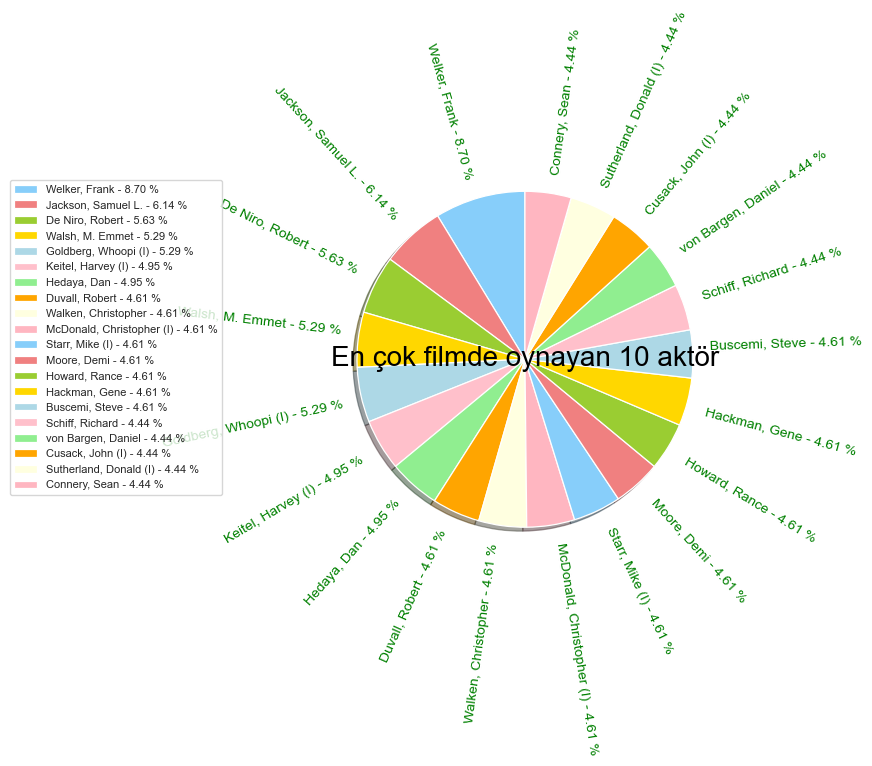

In [278]:
x = oyuncu_film_sayisi.sort_values(ascending=False).head(20).index
y = oyuncu_film_sayisi.sort_values(ascending=False).head(20).values
ilk_10_ciz(x, y, 'En çok filmde oynayan 10 aktör')
plt.savefig('Proje Çıktıları/en_cok_filmde_oynayan_aktorler.png', bbox_inches='tight', dpi=600, transparent=True)

******************************************************

**6-) Aktörlerin oynadığı film türleri**

******************************************************

Akötörlerin oynadığı filmlerin puanlara göre görselleştirilmesini yapalım.

In [279]:

puanlama = pd.DataFrame(film.groupby('baslik')['puan'].mean())  
puanlama['oy_sayisi'] = pd.DataFrame(film.groupby('baslik')['oy_sayisi'].mean())
#türüne göre puanlama
puanlama['tur'] = pd.DataFrame(film.groupby('baslik')['tur'].first())

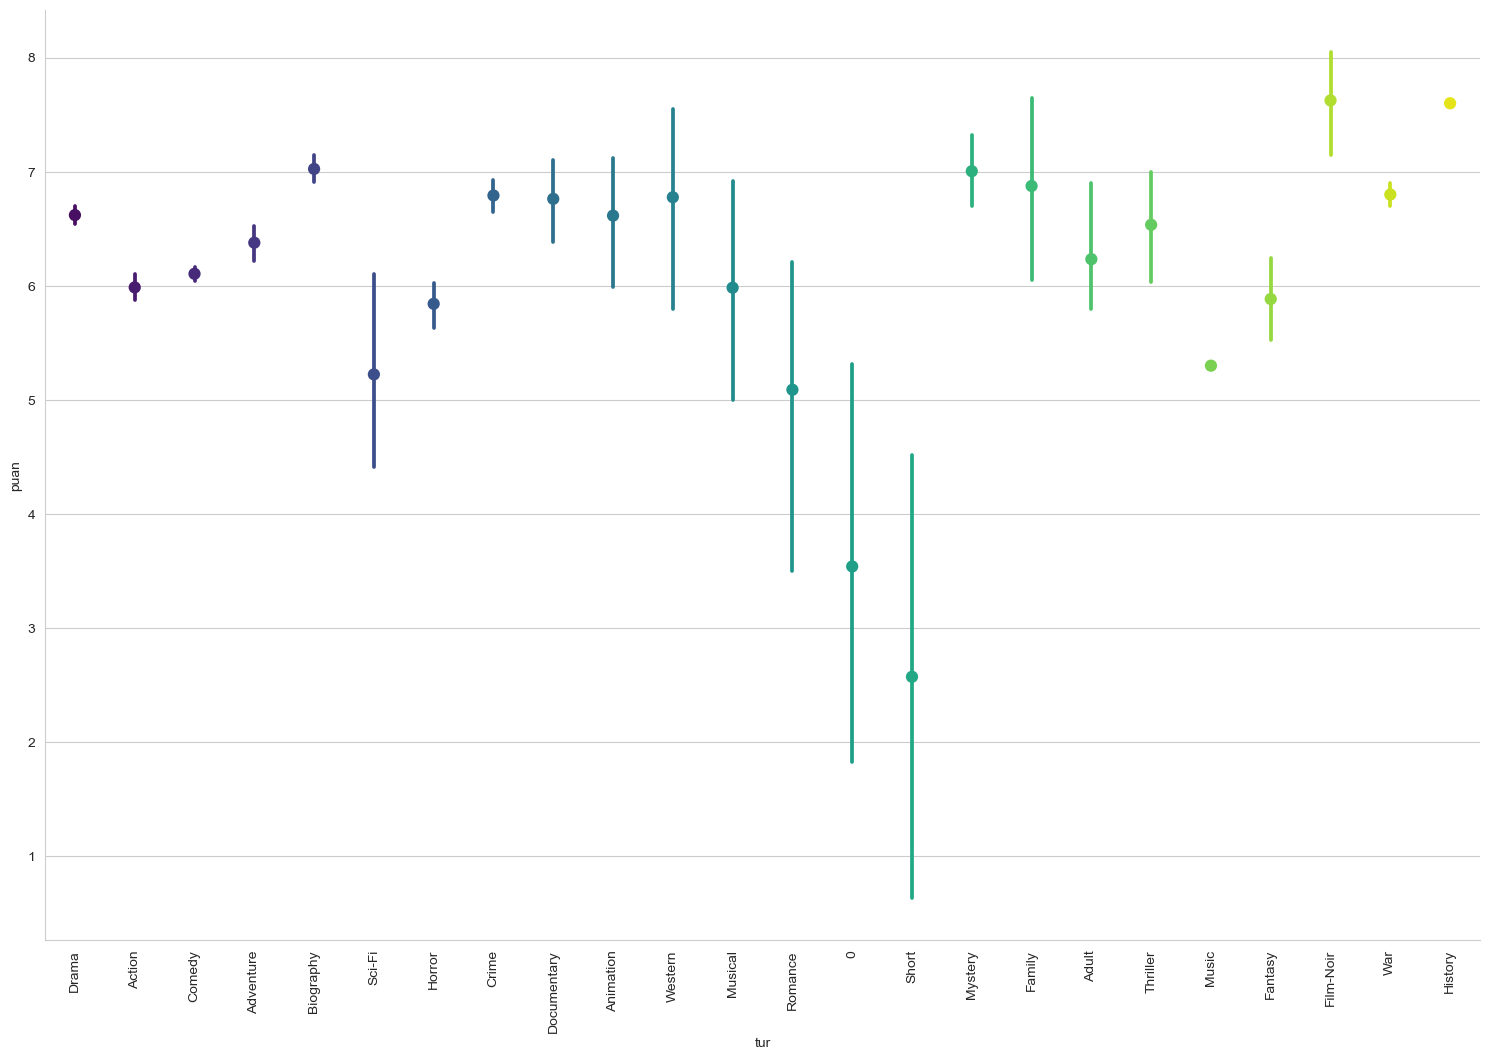

In [280]:

sns.catplot(x = 'tur', y = 'puan', data = puanlama, kind = 'point', height = 10, aspect = 1.5, palette = 'viridis')
plt.xticks(rotation = 90);

In [281]:
film2 = film.copy()
oyuncular_tur = pd.merge(oyuncular_butunu, film2, on='movieid', how='inner') 
oyuncular_tur

,actorid,name,sex,movieid,as_character,leading,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,distribution
0,4,"$hort, Too",M,1722174.0,[Too $hort],0.0,American Pimp (1999),USA,Documentary,"[4.0, 402831.0, 479268.0, 640748.0, 668443.0, ...","[English, English, English, English, English, ...",6.3,1695.0,1999,0.0,"[Underworld Entertainment, Underworld Entertai...",0000122100
1,402831,"Dickson, John S.",M,1722174.0,(as Rosebudd) [Himself],0.0,American Pimp (1999),USA,Documentary,"[4.0, 402831.0, 479268.0, 640748.0, 668443.0, ...","[English, English, English, English, English, ...",6.3,1695.0,1999,0.0,"[Underworld Entertainment, Underworld Entertai...",0000122100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138339,2564182,"Sedgewick, Julie",F,1837323.0,(voice) [Interviewer] <1>,1.0,Creature Comforts (1989),UK,Animation,"[2564182.0, 2564182.0, 2564182.0, 2564182.0, 2...","[English, English, English, English, English, ...",7.7,3484.0,1989,1.0,"[Aardman Animations [gb], Channel Four Films [...",0000001212
138340,2579564,Shweta (I),F,2153421.0,NaN,0.0,Malli (1998),India,Drama,[2579564.0],[Tamil],8.1,30.0,1998,0.0,[nan],0..0001124


Frank Welker'ın en çok filmde oynayan oyuncu olduğunu biliyorduk. Oynadığı filmlerden 19 tanesi macera(*adventure*), 17 tanesi aksiyon(*aksiyon*) olduğunu ve diğer oyuncuların oynadığı en fazla türleri görebiliriz.

In [282]:
#Aktörlerin film türüne göre dağılımı
oyuncuların_film_turune_gore_siralanması = oyuncular_tur.groupby(['name', 'tur']).size().sort_values(ascending=False).reset_index(name='count')
oyuncuların_film_turune_gore_siralanması

,name,tur,count
0,"Welker, Frank",Adventure,19
1,"Cusack, Joan",Comedy,18
...,...,...,...
111882,"Groth, Robin",Adventure,1
111883,Überzone,Documentary,1


En çok türde oynayan 5 oyunucuyu belirleyebiliriz.

In [283]:
oyuncuların_film_turune_gore_siralanması.groupby('name').head(1).sort_values(by='count', ascending=False).head(5)

,name,tur,count
0,"Welker, Frank",Adventure,19
1,"Cusack, Joan",Comedy,18
3,"Goldberg, Whoopi (I)",Comedy,16
4,"Connery, Sean",Action,16
5,"Allen, Woody",Comedy,16


**7-) Ülkelere göre hangi tür filmler çekilmiş?** 

Ülkeleri birleştirelim ve en çok filmi olan ülkeleri ayıralım. Hepsi için tek tek türleri çizdirebiliriz. Neredeyse tüm ülkeler için drama ve komedi en çok oynanılan türler. 

USA, UK ve Kanada için en çok komedi türünün olmasına rağmen, Fransa için dramanın daha ön plana çıktığını görüyoruz.

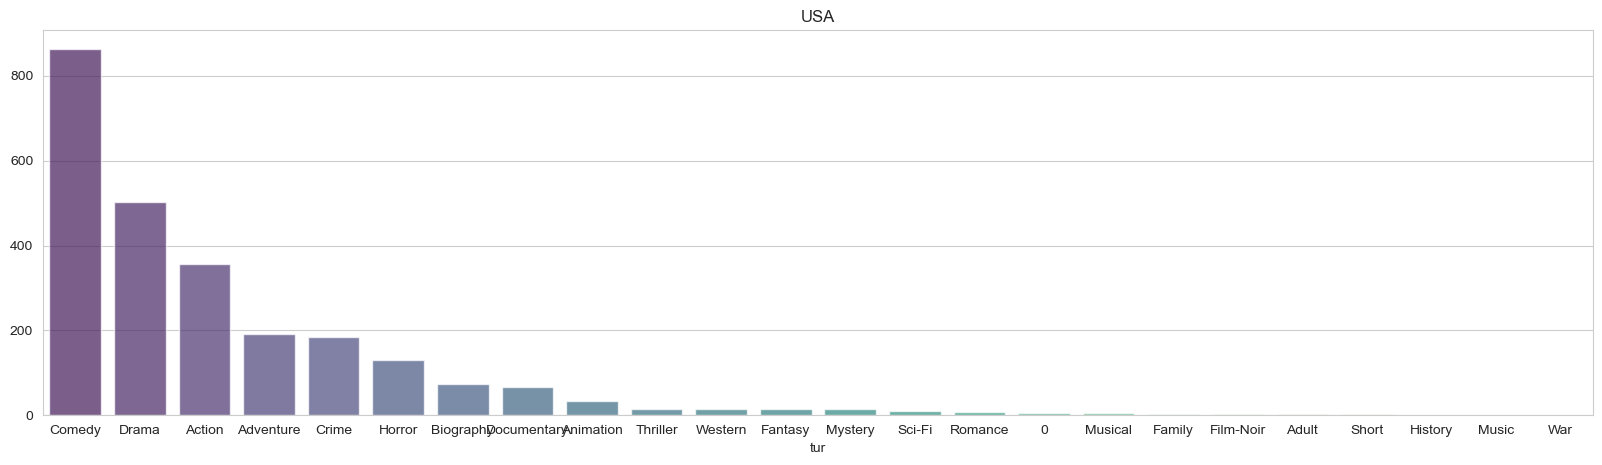

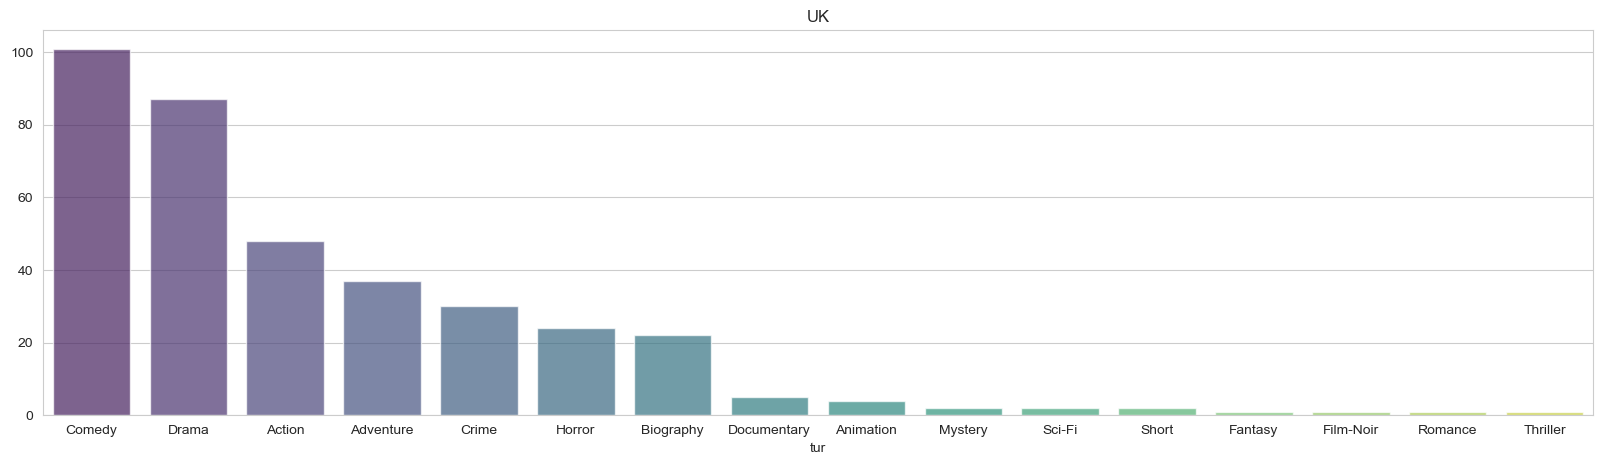

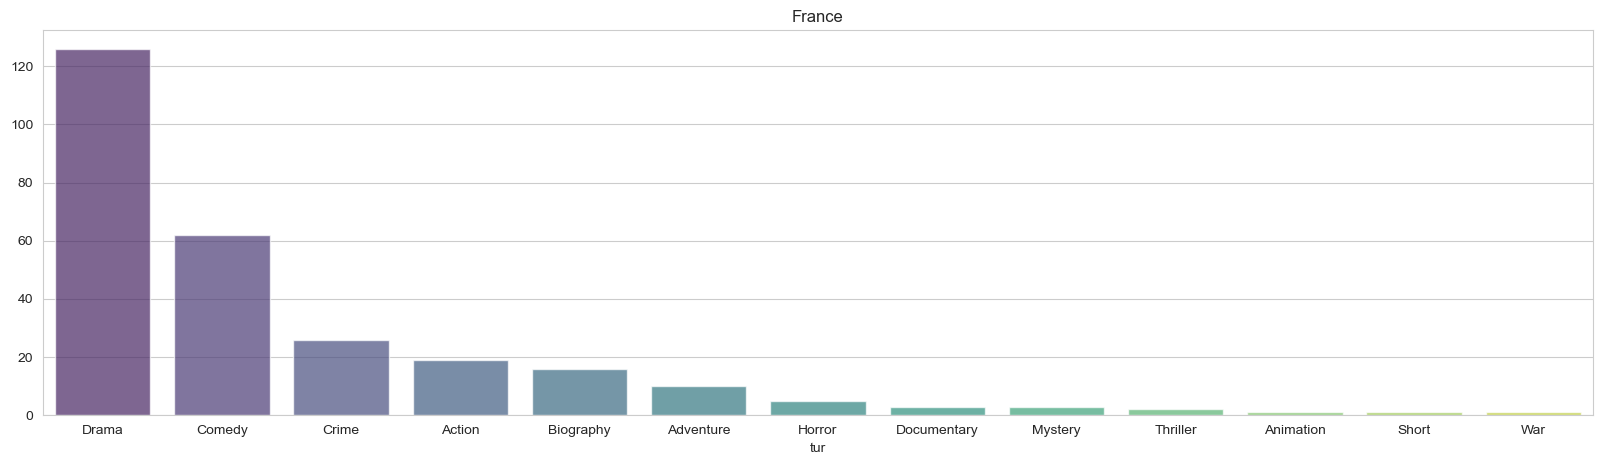

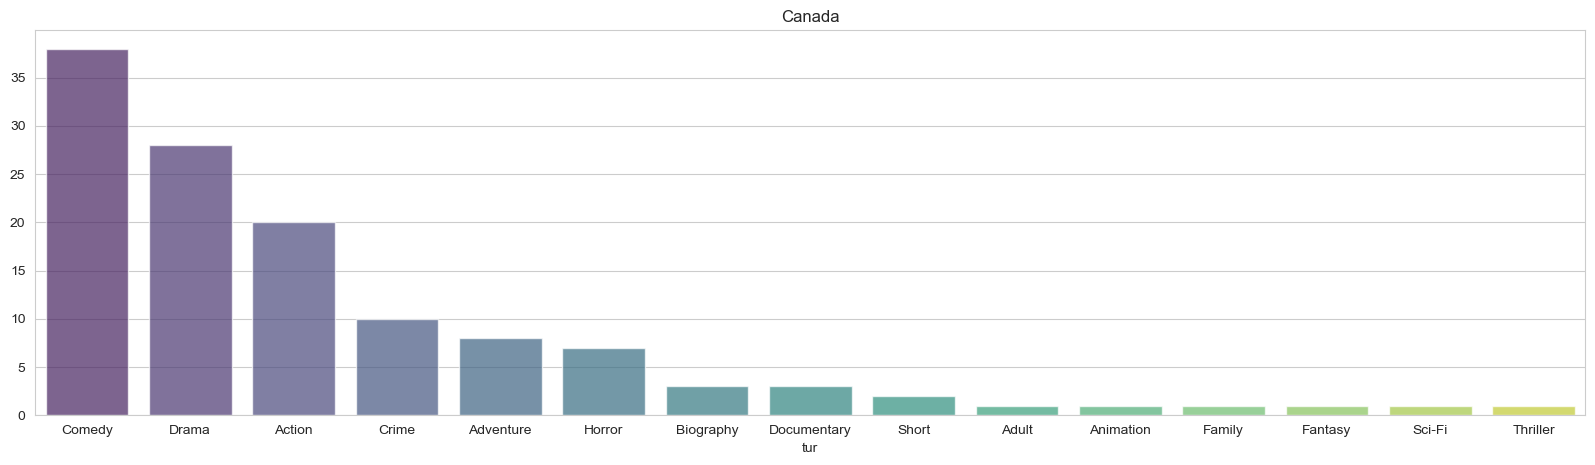

In [284]:

ulke_tur = pd.concat([film['tur'],film['ulke']], axis=1)

ulke_tur.head(10)
ulke_tur = ulke_tur.groupby("ulke")["tur"].value_counts()
ulke_tur



#en çok filmi olan 10 ülke
film.groupby('ulke').count()['baslik'].sort_values(ascending=False).head(10)
#USA, UK, Fransa, Kanada ve Türkiye için inceleyelim.
usa = ulke_tur.loc['USA']
uk = ulke_tur.loc['UK']
fr = ulke_tur.loc['France']
can = ulke_tur.loc['Canada']


#Grafik çizimi için fonksiyon tanımlayalım.
def ciz(country, title):
    plt.figure(figsize=(20,5))
    sns.barplot(x=country.index, y=country.values, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.show()

ciz(usa, 'USA')
ciz(uk, 'UK')
ciz(fr, 'France')
ciz(can, 'Canada')

    



******************************************************

**8-) Türe göre kadın-erkek aktör sayısı**

******************************************************

*Büyük set birleşiminde kadın-erkek aktör sayısı*

Dosyanın orijinal haliyle kadın-erkek sayısına erişmek için movies_1(*df1*) kullanmamız yeterli olacaktır.


In [285]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98690 entries, 0 to 98689
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   actorid  98690 non-null  int64 
 1   name     98690 non-null  object
 2   sex      98690 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [286]:
df1.groupby('sex').count()['name'].sort_values(ascending=False)

sex
M    65794
F    32896
Name: name, dtype: int64

65.794 erkek ve 32.896 kadın oyuncuya dair verimiz var ancak veri setlerini birleştirip eksik veriler nedeniyle bilgi kaybettiğimiz zaman bu oranın çok değişeceğini dolayısıyla yanlış yönlendirebileceğini göreceğiz. 

*Küçük sette türe göre kadın-erkek aktör sayısı*

In [287]:
cinsiyet = sayisini_bul(oyuncular, 'cinsiyet')
cinsiyet

cinsiyet
M    3782
F      16
dtype: int64

Bunun kaynağı veri setini başta temizleyip ona göre inceleme yapmamız. Sadece cinsiyet, tür ve film kodlarıyla oyuncu kodlarını birleştiren veri setlerini kullanarak yapılan bir analiz daha anlamlı bir veri sağlayacaktır. 1. 3. ve 6. veri setlerini kullanacağız. Kafa karıştırmaması için baştan okutalım ve yeniden isimlendirelim.

b'Skipping line 16932: expected 4 fields, saw 5\nSkipping line 16933: expected 4 fields, saw 5\nSkipping line 16943: expected 4 fields, saw 5\nSkipping line 16948: expected 4 fields, saw 5\nSkipping line 36078: expected 4 fields, saw 5\nSkipping line 36086: expected 4 fields, saw 6\nSkipping line 39517: expected 4 fields, saw 5\n'


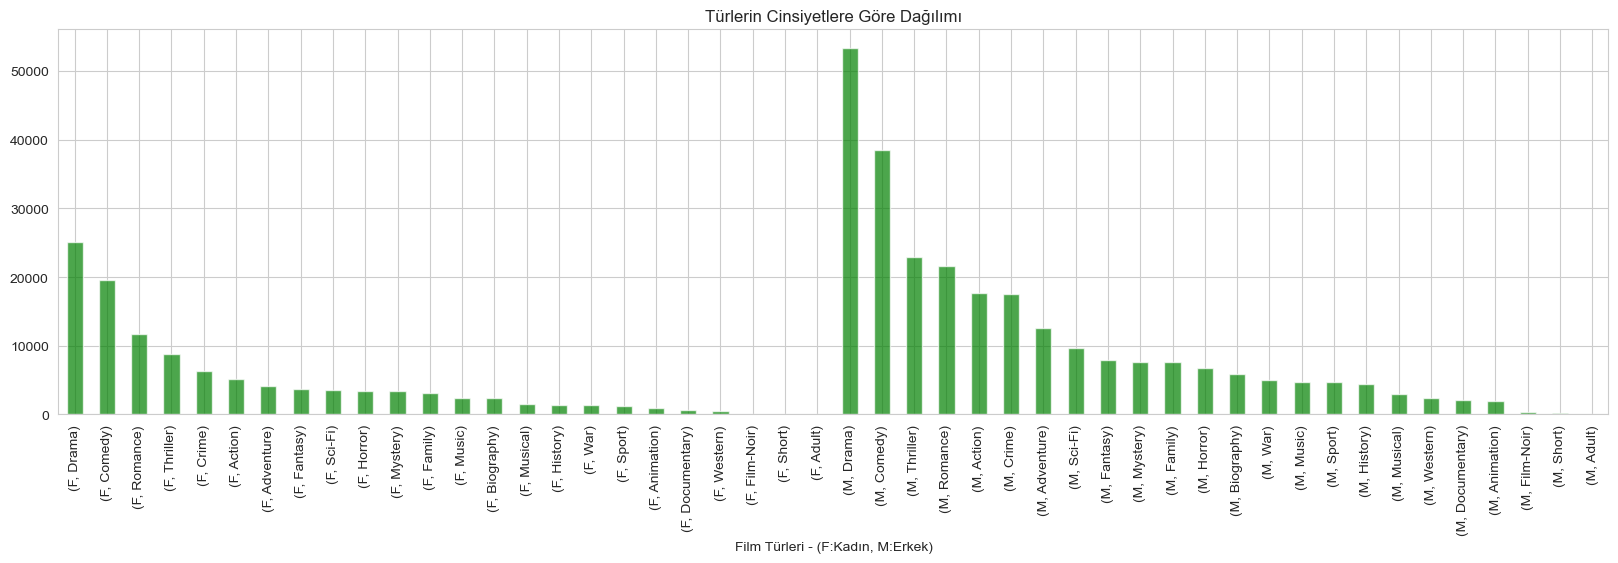

(<AxesSubplot:title={'center':'Türlerin Cinsiyetlere Göre Dağılımı'}, xlabel='Film Türleri - (F:Kadın, M:Erkek)'>,
 Text(0.5, 21.999999999999986, 'Film Türleri - (F:Kadın, M:Erkek)'),
 Text(0.5, 1.0, 'Türlerin Cinsiyetlere Göre Dağılımı'),
 None)

In [288]:
aktor_ve_film = pd.read_csv("movies_dataset/movies_6.csv", on_bad_lines='warn')
tur_ve_aktor = pd.read_csv("movies_dataset/movies_3.csv", on_bad_lines='warn')
cinsiyet_ve_aktor = pd.read_csv("movies_dataset/movies_1.csv", on_bad_lines='warn')

aktor_ve_film = aktor_ve_film[['movieid', 'actorid']]
tur_ve_aktor = tur_ve_aktor[['movieid', 'genre']]
cinsiyet_ve_aktor= cinsiyet_ve_aktor[['sex', 'actorid']]

#Cinsiyet, film ve aktörlerin birleştirilmesi
tur_ve_aktor_ve_cinsiyet = pd.merge(aktor_ve_film, cinsiyet_ve_aktor, on='actorid')
tur_ve_aktor_ve_cinsiyet = tur_ve_aktor_ve_cinsiyet.merge(tur_ve_aktor, on='movieid')


#Türe göre aktörlerin sayısını bulalım.





tur_ve_aktor_ve_cinsiyet
grup = tur_ve_aktor_ve_cinsiyet.groupby('sex')['genre'].value_counts()
grup.plot(kind='bar', figsize=(20,5), color='green', alpha=0.7), plt.xlabel('Film Türleri - (F:Kadın, M:Erkek)'), plt.title('Türlerin Cinsiyetlere Göre Dağılımı'), plt.show()




Görüyoruz ki bu orantısızlık kadın oyuncuların olduğu veri setlerinin film kodlarıyla olan listeye dahil edilmemesinden kaynaklanıyor. Yoksa yarı yarıya da olsa kadın oyuncu mevcut, ancak veri setleri bölünürken cinsiyete göre sıralanmış ve kesilmiş ve bu yüzden kadın oyunculara dair film kodu verileri kaybedilmiş.


In [289]:
#Türe göre kadın erkek sayısını bulalım.

ture_gore_cinsiyet_sayisi = pd.concat([film['tur'], oyuncular['cinsiyet']], axis=1).groupby("tur")["cinsiyet"].value_counts()


Çok sağlıklı bir analiz olmasa da en azından cinsiyetler için en çok çekilen türleri görebiliyoruz.

In [290]:
#En çok filme göre bakalım.
tur_cinsiyet = pd.concat([film['tur'], oyuncular['cinsiyet']], axis=1).groupby("tur")["cinsiyet"].value_counts().sort_values(ascending=False).reset_index(name="count")
tur_cinsiyet

,tur,cinsiyet,count
0,Comedy,M,1185
1,Drama,M,911
...,...,...,...
30,Crime,F,1
31,Music,M,1


Burada dengesizliği daha net görebiliyoruz. Neredeyse kadın oyuncunun oynadığı oyun yok gibi.

In [291]:
ture_gore_cinsiyet_sayisi

tur      cinsiyet
0        M           12
         F            1
                     ..
War      M            2
Western  M           17
Name: cinsiyet, Length: 32, dtype: int64

In [292]:
#Bazı türlerde kadınlar hiç oynamamış. Bu yüzden az oynan türleri çıkartalım.
#Çıkarttıktan sonra plotunu çizelim. 


turler = tur_cinsiyet['tur'].unique()



#Cinsiyeti sayısallaştıralım.



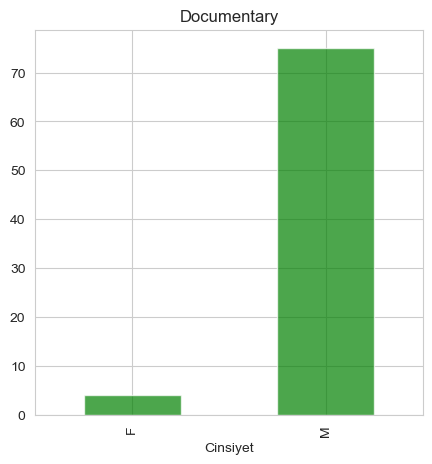

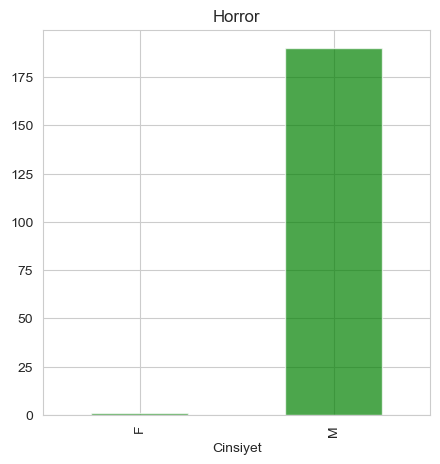

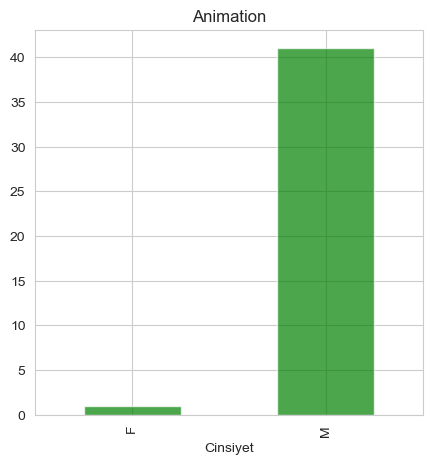

In [293]:

#Türlerin cinsiyet dağılımını görselleştirelim.
def cinsiyet_tur_grafik(tur):
    cinsiyet_tur = tur_cinsiyet[tur_cinsiyet['tur'] == tur]
    cinsiyet_tur = cinsiyet_tur.groupby('cinsiyet')['count'].sum()
    cinsiyet_tur.plot(kind='bar', figsize=(5,5), color='green', alpha=0.7), plt.xlabel('Cinsiyet'), plt.title(tur), plt.show()
cinsiyet_tur_grafik('Documentary')
cinsiyet_tur_grafik('Horror')
cinsiyet_tur_grafik('Animation')

******************************************************

**9-) Ülkelere göre puanlar ve oy sayısı**

******************************************************

In [294]:
film_puan_oy = pd.concat([film['ulke'], film['puan'], film['oy_sayisi']], axis=1)
#floata çevirme
film_puan_oy['oy_sayisi'] = film_puan_oy['oy_sayisi'].astype(float)
film_puan_oy['puan'] = film_puan_oy['puan'].astype(float)


In [295]:
#Puanları kategorik bir hale getirelim.

film_puan_oy['puan_kat'] = pd.cut(film_puan_oy['puan'], bins=[0, 5, 6, 7, 8, 9, 10], labels=['0-5', '5-6', '6-7', '7-8', '8-9', '9-10'])
film_puan_oy['oy_sayisi_kat'] = pd.cut(film_puan_oy['oy_sayisi'], bins=[0, 1000, 10000, 100000, 1000000, 10000000], labels=['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000'])


Text(0.5, 1.05, 'Ülkelerin Puan ve Oy Sayısına Göre Dağılımı')

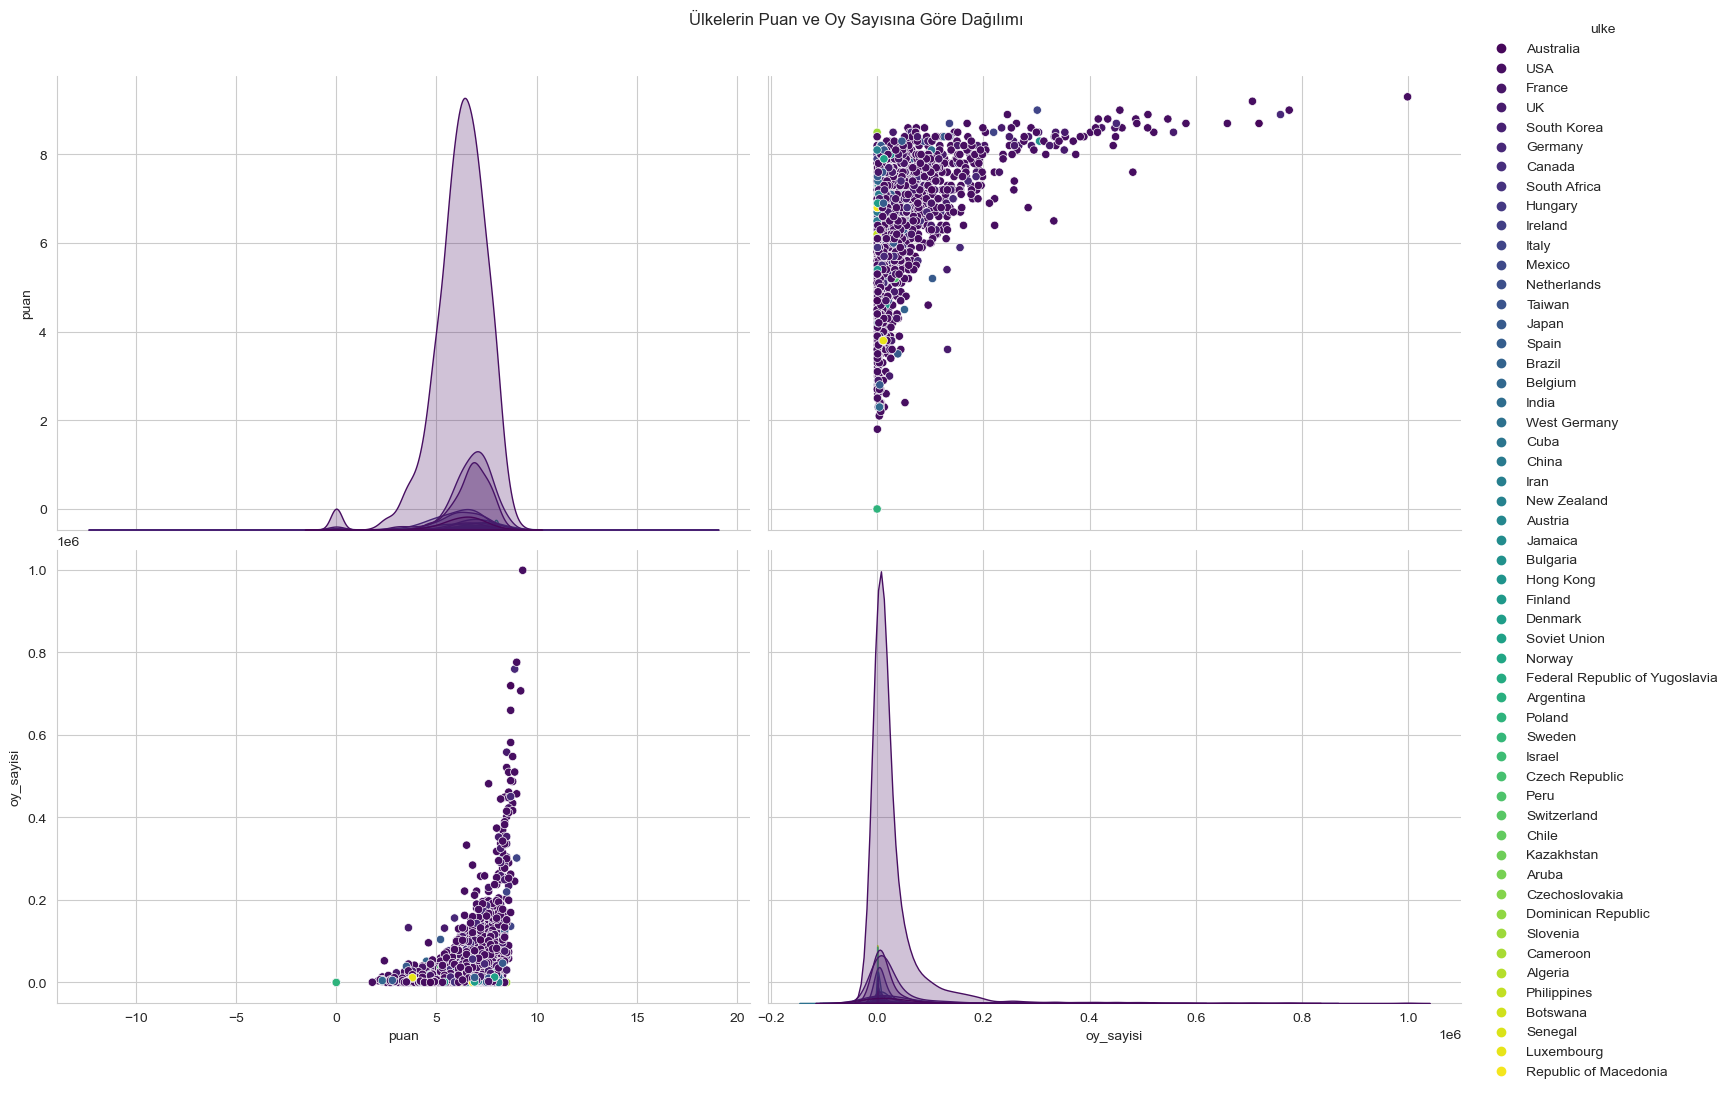

In [296]:
#Puan ve oy sayısına göre ülkelerin dağılımını görselleştirelim.
sns.pairplot(film_puan_oy, hue='ulke', palette='viridis', height=5, aspect=1.5).fig.suptitle('Ülkelerin Puan ve Oy Sayısına Göre Dağılımı', y=1.05)

Oy sayısının farklı ülkelerdeki dağılımlarını görebiliriz.

C:\Users\basak\AppData\Local\Temp\ipykernel_16468\3724382150.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='ulke', y='oy_sayisi', data=film_puan_oy, palette='viridis').set_title('Ülkelerin Oy Sayısına Göre Dağılımı')


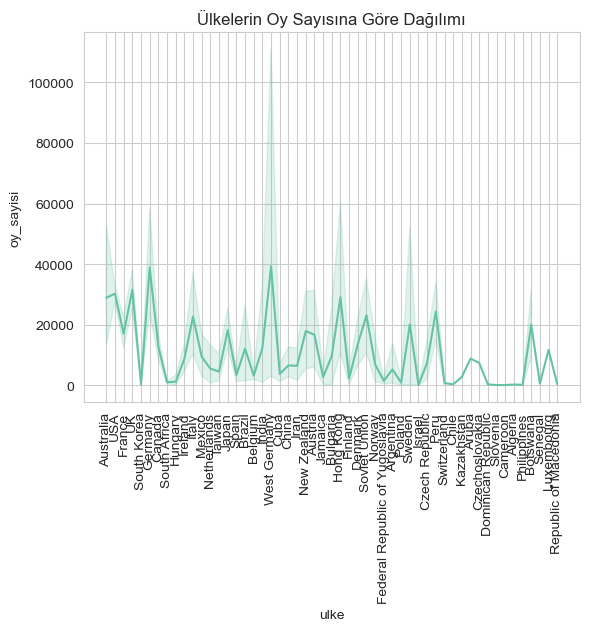

In [297]:
sns.lineplot(x='ulke', y='oy_sayisi', data=film_puan_oy, palette='viridis').set_title('Ülkelerin Oy Sayısına Göre Dağılımı')
plt.xticks(rotation=90);


******************************************************

**10-) Türlere göre puanlar ve oylar**

******************************************************

In [298]:

film_tur_puan = pd.concat([film['tur'], film['puan'], film['oy_sayisi']], axis=1)

In [299]:
film_tur_puan['oy_sayisi'] = film_tur_puan['oy_sayisi'].astype(float)


Çok verisi olan filmler arasında Film-Noir türünün en yüksek puanları aldığını ve Aile ve Batı türü filmlerin bunu takip ettiğini görebiliyoruz. En çok veriye sahip olduğu halde genelde en düşük puanları alan tür Kısa Filmler.

Oy sayısında ise Gizem türünün çok oy aldığını, suç ve aksiyonun takip ettiğini görüyoruz.

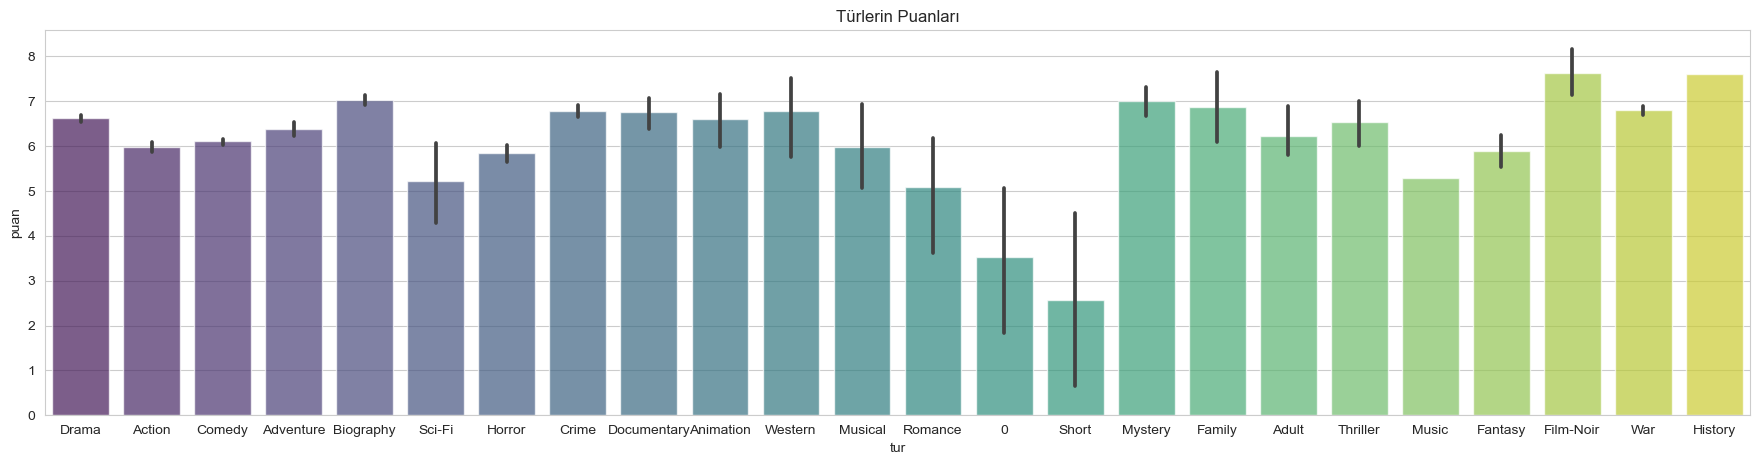

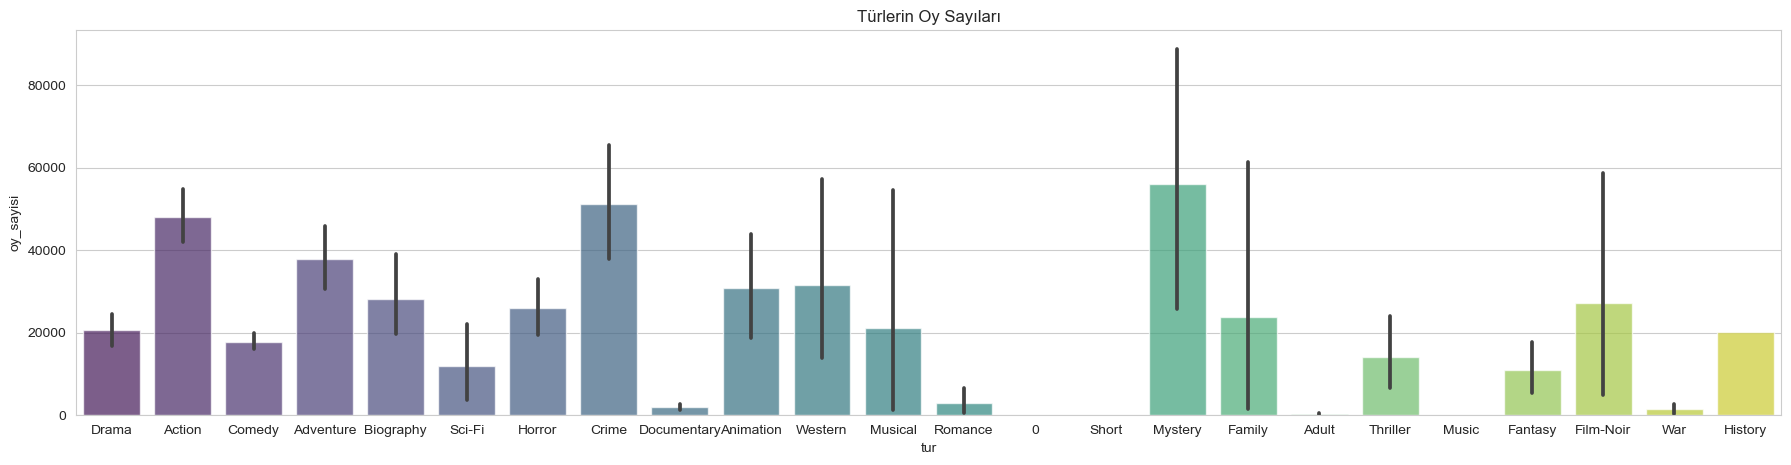

In [300]:
fig, ax = plt.subplots(figsize=(22,5))
film_tur_puan["puan"] = film_tur_puan["puan"].astype(float)
puan_tur = sns.barplot(x = "tur", y = "puan", data = film_tur_puan, palette='viridis', alpha=0.7,).set_title('Türlerin Puanları')

fig, ax = plt.subplots(figsize=(22,5))
oy_sayisi_tur = sns.barplot(x = "tur", y = "oy_sayisi", data = film_tur_puan, palette='viridis', alpha=0.7).set_title('Türlerin Oy Sayıları')
plt.show()


***************************************************

**11-) Puan ve Oylama Miktarlarına Göre Filmlerin İncelenmesi**

*********************************************************

In [301]:
moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')
puanlama = pd.DataFrame(film.groupby('baslik')['puan'].mean())  
puanlama['oy_sayisi'] = pd.DataFrame(film.groupby('baslik')['oy_sayisi'].mean())
#türüne göre puanlama
puanlama['tur'] = pd.DataFrame(film.groupby('baslik')['tur'].first())
moviemat.head()

baslik,'Breaker' Morant (1980),'Crocodile' Dundee II (1988),'Til There Was You (1997),"'night, Mother (1986)",...And Justice for All (2014),1-2-3-4 ou Les collants noirs (1961),1-900 (1996),10 Things I Hate About You (1999),101 Dalmatians (1996),12 Angry Men (1957),...,Zbogum na dvaesetiot vek (1998),Zerkalo (1975),Zero Effect (1998),Zeus and Roxanne (1997),Zone 39 (1996),eXistenZ (1999),¡Three Amigos! (1986),À nous la liberté (1931),Á köldum klaka (1995),Átame! (1990)
movieid,,,,,,,,,,,,,,,,,,,,,
1672052,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672111,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672580,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672716,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672946,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
puanlama.sort_values('puan', ascending = False).head(10)

moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')

puanlama.sort_values('oy_sayisi', ascending = False).head(10)

,puan,oy_sayisi,tur
baslik,,,
The Shawshank Redemption (1994),9.3,998823.0,Crime
Pulp Fiction (1994),9.0,775943.0,Crime
...,...,...,...
Star Wars (1977),8.8,547422.0,Action
American Beauty (1999),8.5,520963.0,Drama


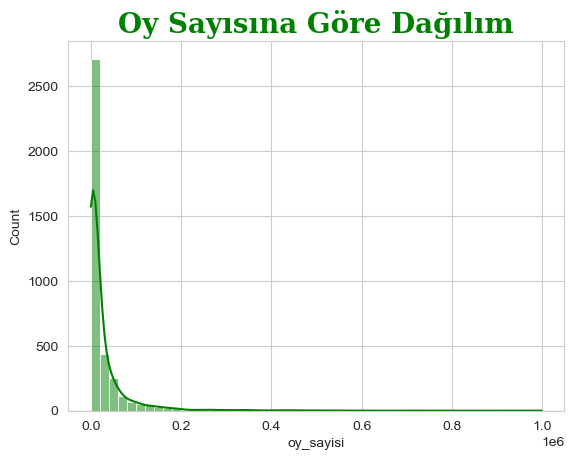

In [303]:
oy_dagilimi = sns.histplot(puanlama['oy_sayisi'],
                           bins=50, kde=True, color = 'green').set_title('Oy Sayısına Göre Dağılım',
                                                        fontsize=20, fontweight='bold',
                                                        color='green',fontfamily='serif')


Text(0.5, 1.0, 'Puanlara Göre Dağılım')

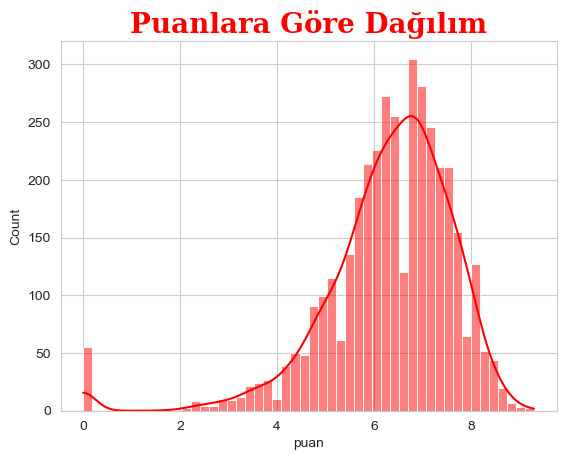

In [304]:
sns.histplot(puanlama['puan'], bins=50, kde=True, color='red').set_title('Puanlara Göre Dağılım', color='red', fontsize=20, fontweight='bold', fontfamily='serif')

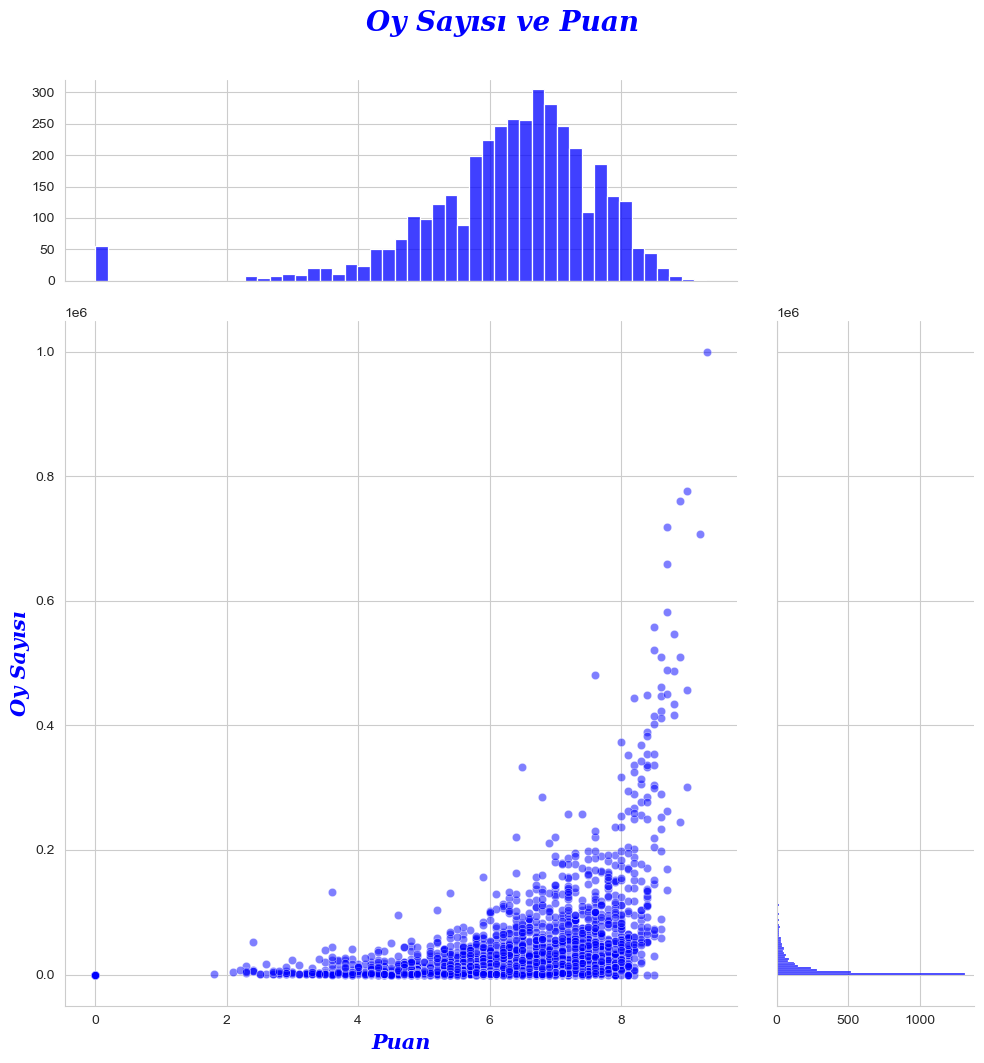

In [305]:
oy_puan =sns.jointplot(x='puan', y='oy_sayisi',
              data = puanlama, alpha=0.5,
              color='blue', height=10, ratio=3,
              space=0.2, marginal_ticks=True,
              joint_kws={'alpha':0.5});
oy_puan.fig.suptitle('Oy Sayısı ve Puan', fontsize=20, y=1.05, x=0.5, color='blue', fontweight='bold', fontfamily='serif', style='italic')
oy_puan.set_axis_labels('Puan', 'Oy Sayısı', fontsize=15, color='blue', fontweight='bold', fontfamily='serif', style='italic')

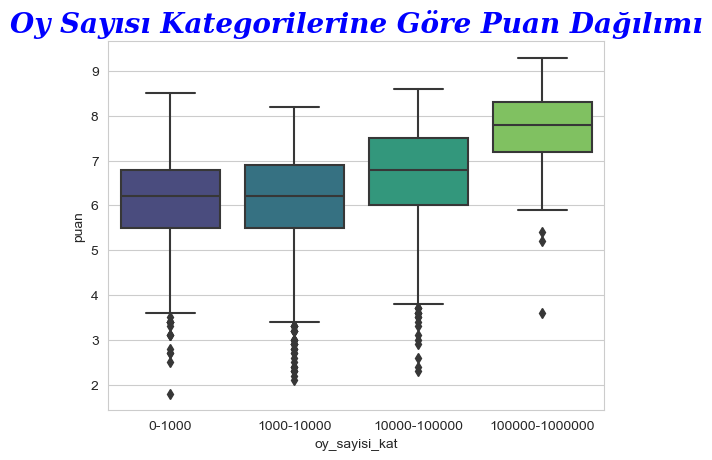

In [306]:
#Daha sonra lazım olacak.
#Puanlama ve oy sayılarını kategorik hale getirelim

puanlama_aralik = puanlama['oy_sayisi'].quantile(np.arange(0, 1, .01))

puanlama_aralik = puanlama_aralik.astype(int)

puanlama_aralik


puanlama['oy_sayisi_kat'] = pd.cut(puanlama['oy_sayisi'], bins=[0, 1000, 10000, 100000, 1000000],
                                   labels=['0-1000', '1000-10000', '10000-100000', '100000-1000000'])
oy_box = sns.boxplot(x='oy_sayisi_kat', y='puan', data=puanlama, palette='viridis').set_title('Oy Sayısı Kategorilerine Göre Puan Dağılımı', fontsize=20, fontweight='bold', fontfamily='serif', color='blue', style='italic')

* Histogramların incelenmesi için fonksiyon oluşturma



In [307]:
def histogram_olustur(df, kolon, title):
    plt.figure(figsize =(10, 4))
    sns.set_style("whitegrid")
    sns.set_palette("Set2")
    df[kolon].hist(bins = 70)
    plt.title(title, fontsize=15)

In [308]:
film.head()

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,distribution
movieid,,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,"[7 Network [au], Australian Film Commission, T...",0000001222
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,"[Paramount Pictures [us], Rimfire Films [au], ...",0001221000
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,"[Lakeshore Entertainment [us], Paramount Pictu...",0011110000
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,"[Aaron Spelling Productions [us], Blackbird Pr...",0000001212
1672946,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",0,0,2014,2.0,"[Grindhouse Films [us], Grindhouse Films [us],...",0


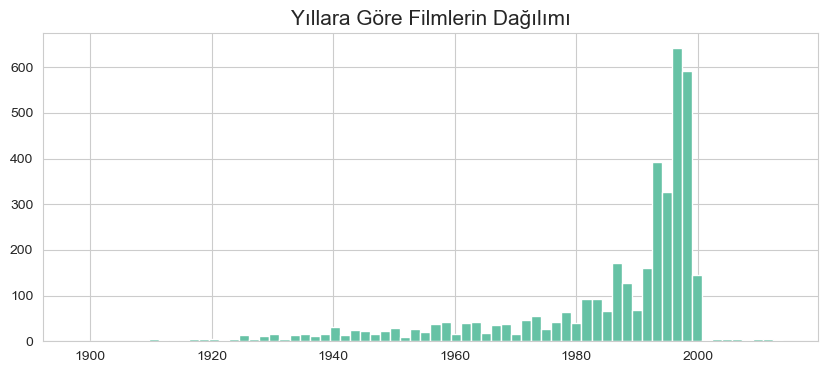

In [309]:
histogram_olustur(film, 'yil', 'Yıllara Göre Filmlerin Dağılımı')

<AxesSubplot:title={'center':'Puanlara Göre Filmlerin Dağılımı'}, ylabel='Frequency'>

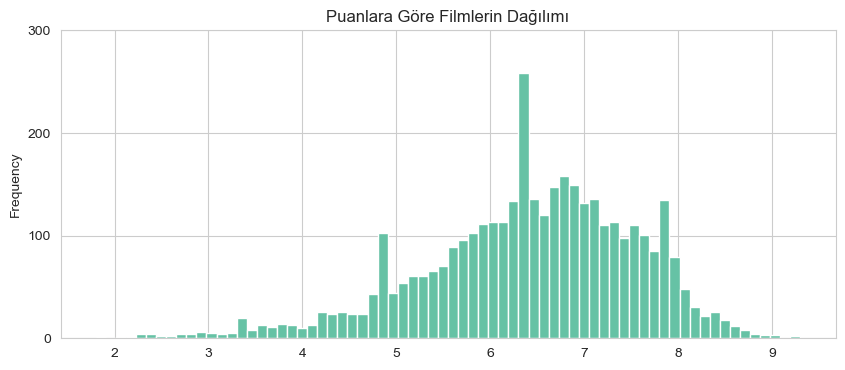

In [310]:
#0 grubu outlier olarak düşünülebilir. 0 olanları çıkartalım. Bu sıfırları daha önce doldurmuştum.
film = film[film['puan'] != str(0)]
film["puan"].astype("float").plot(kind = 'hist', bins = 70, figsize = (10,4), title='Puanlara Göre Filmlerin Dağılımı', yticks=range(0, 400, 100))

       -------------------------------------------------------------Ekstra-----------------------------------------------------------------------------

**12-) Film Arama Motoru** 

*******************************************************

In [311]:

#Sadece bu karakterleri kullanan isimler lazım.
def temizleme(baslik):
    return re.sub("[^a-zA-Z0-9 ]", " ", baslik)


In [312]:
film['temiz_baslik'] = film['baslik'].apply(temizleme)

In [313]:
#Başlıkları vektörler halinde tutalım.

 
vektor = TfidfVectorizer(ngram_range=(1, 2))
tfidf = vektor.fit_transform(film['temiz_baslik'])

In [314]:
film

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,distribution,temiz_baslik
movieid,,,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,"[7 Network [au], Australian Film Commission, T...",0000001222,Breaker Morant 1980
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,"[Paramount Pictures [us], Rimfire Films [au], ...",0001221000,Crocodile Dundee II 1988
...,...,...,...,...,...,...,...,...,...,...,...,...
2593112,Á köldum klaka (1995),Denmark,Comedy,"[60288.0, 60288.0, 60288.0, 60288.0, 60288.0, ...","[English, English, English, English, English, ...",6.9,1231.0,1995,25.0,"[Altar Productions - (co-production), Film Fon...",0000012211,k ldum klaka 1995
2593313,Átame! (1990),Spain,Comedy,"[32498.0, 91416.0, 91423.0, 330811.0, 387030.0...","[Spanish, Spanish, Spanish, Spanish, Spanish, ...",6.9,12087.0,1990,26.0,"[El Deseo S.A. [es], El Deseo S.A. [es], El De...",0000013210,tame 1990


In [315]:
pd.set_option('display.max_rows', 5)


film_temizlenmis = film.drop(['oyuncu_kodu', 'dil'], axis = 1)
film.drop_duplicates(subset='baslik', inplace=True)

def arama(baslik):
    baslik = temizleme(baslik)
    sorgu_vektoru = vektor.transform([baslik])
    benzerlik = cosine_similarity(tfidf, sorgu_vektoru).flatten()
    #en_benzer = np.argsort(-benzerlik)[:10]
    #return film.iloc[en_benzer]
    indis = np.argpartition(benzerlik, -5)[-5:]
    sonuc = film_temizlenmis.iloc[indis][::-1]
    return sonuc

arama('Star Wars')

,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,distribution,temiz_baslik
movieid,,,,,,,,,,
2371726,Star Wars (1977),USA,Action,8.8,547422.0,1977,0.0,[Lucasfilm [us] - (as A Lucasfilm Limited Prod...,0000000123,Star Wars 1977
2371778,Star Wars: Episode I - The Phantom Menace (1999),USA,Action,6.5,332748.0,1999,11.0,"[Lucasfilm [us], Lucasfilm [us], Lucasfilm [us...",0000012101,Star Wars Episode I The Phantom Menace 1999
2371786,Star Wars: Episode V - The Empire Strikes Back...,USA,Action,8.8,487093.0,1980,8.0,[Lucasfilm [us] - (as A Lucasfilm Limited Prod...,0000000123,Star Wars Episode V The Empire Strikes Back...
2371787,Star Wars: Episode VI - Return of the Jedi (1983),USA,Action,8.4,382574.0,1983,37.0,[Lucasfilm [us] - (as A Lucasfilm Limited Prod...,0000001222,Star Wars Episode VI Return of the Jedi 1983
2216295,North Star (1996),France,Action,4.6,695.0,1996,10.0,"[AFCL Productions, Canal+ [fr], Cofimage 6 [fr...",0001210000,North Star 1996


In [316]:
arama('The Godfather')

,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,distribution,temiz_baslik
movieid,,,,,,,,,,
2437300,The Godfather: Part III (1990),USA,Crime,7.6,167195.0,1990,42.0,"[Paramount Pictures [us], Zoetrope Studios [us...",0000002211,The Godfather Part III 1990
2437299,The Godfather: Part II (1974),USA,Crime,9.0,457100.0,1974,36.0,[Paramount Pictures [us] - (as A Paramount Pic...,0000000124,The Godfather Part II 1974
2437277,The Godfather (1972),USA,Crime,9.2,706695.0,1972,15.0,[Alfran Productions [us] - (produced by) (as A...,0000000125,The Godfather 1972
2419930,The City of the Dead (1960),UK,Horror,6.8,2529.0,1960,13.0,"[Vulcan, Vulcan, Vulcan, Vulcan, Vulcan, Vulca...",0000012111,The City of the Dead 1960
2479393,The Slipper and the Rose: The Story of Cindere...,UK,Adventure,6.5,1319.0,1976,39.0,[Paradine Co-Productions - (presents) (as Para...,0000011113,The Slipper and the Rose The Story of Cindere...


In [317]:


def arama(baslik):
    baslik = temizleme(baslik)
    sorgu_vektoru = vektor.transform([baslik])
    benzerlik = cosine_similarity(tfidf, sorgu_vektoru).flatten()
    #en_benzer = np.argsort(-benzerlik)[:10]
    #return film.iloc[en_benzer]
    indis = np.argpartition(benzerlik, -5)[-5:]
    sonuc = film_temizlenmis.iloc[indis][::-1]
    return sonuc

arama('Star Wars')


,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,distribution,temiz_baslik
movieid,,,,,,,,,,
2371726,Star Wars (1977),USA,Action,8.8,547422.0,1977,0.0,[Lucasfilm [us] - (as A Lucasfilm Limited Prod...,0000000123,Star Wars 1977
2371778,Star Wars: Episode I - The Phantom Menace (1999),USA,Action,6.5,332748.0,1999,11.0,"[Lucasfilm [us], Lucasfilm [us], Lucasfilm [us...",0000012101,Star Wars Episode I The Phantom Menace 1999
2371786,Star Wars: Episode V - The Empire Strikes Back...,USA,Action,8.8,487093.0,1980,8.0,[Lucasfilm [us] - (as A Lucasfilm Limited Prod...,0000000123,Star Wars Episode V The Empire Strikes Back...
2371787,Star Wars: Episode VI - Return of the Jedi (1983),USA,Action,8.4,382574.0,1983,37.0,[Lucasfilm [us] - (as A Lucasfilm Limited Prod...,0000001222,Star Wars Episode VI Return of the Jedi 1983
2216295,North Star (1996),France,Action,4.6,695.0,1996,10.0,"[AFCL Productions, Canal+ [fr], Cofimage 6 [fr...",0001210000,North Star 1996


In [318]:

#film_girisi = widgets.interactive(arama, baslik = 'Star Wars')

widgets.Text(value='', placeholder='Bir film adı giriniz.', description='Film: ', disabled=False)

film_girisi = widgets.Output()

In [319]:
#film_girisi = widgets.interactive(arama, baslik = 'Star Wars')

film_girisi = widgets.Text(value=" ", aciklama="Film Adı", disabled=False, placeholder="Bir film adı giriniz.")
film_girisi


film_Listesi = widgets.Output()

def yazarken(veri):
    with film_Listesi:
        film_Listesi.clear_output()
        baslik = veri["new"]
        if len(baslik)>5:
            display(arama(baslik))
    
    
    
film_girisi.observe(yazarken, names="value")
display(film_girisi, film_Listesi)



Text(value=' ', placeholder='Bir film adı giriniz.')

Output()

*****************************************************

**13-) Oluşturulmuş metriklere göre analizler**

*******************************************************************


Puan ve Oylamaya göre en popüler filmleri inceleyelim.

In [320]:
moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')
              
puanlama = pd.DataFrame(film.groupby('baslik')['puan'].mean())  
puanlama['oy_sayisi'] = pd.DataFrame(film.groupby('baslik')['oy_sayisi'].mean())
#türüne göre puanlama
puanlama['tur'] = pd.DataFrame(film.groupby('baslik')['tur'].first())
moviemat.head()
  
puanlama.sort_values('puan', ascending = False).head(10)

moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')

puanlama.sort_values('oy_sayisi', ascending = False).head(10)
           

,puan,oy_sayisi,tur
baslik,,,
The Shawshank Redemption (1994),9.3,998823.0,Crime
Pulp Fiction (1994),9.0,775943.0,Crime
...,...,...,...
Star Wars (1977),8.8,547422.0,Action
American Beauty (1999),8.5,520963.0,Drama


In [321]:
moviemat = moviemat.fillna(int(0))


In [322]:
puanlama.drop_duplicates(inplace=True)
puanlama.head()

,puan,oy_sayisi,tur
baslik,,,
'Breaker' Morant (1980),7.8,8111.0,Drama
'Crocodile' Dundee II (1988),5.3,32183.0,Action
'Til There Was You (1997),4.4,1894.0,Comedy
"'night, Mother (1986)",7.0,1255.0,Drama
1-2-3-4 ou Les collants noirs (1961),6.5,128.0,Drama


In [323]:
puanlama.dtypes


puan         float64
oy_sayisi    float64
tur           object
dtype: object

In [324]:
#Oy sayısını normalleştirelim.
puanlama['oy_sayisi'] = puanlama['oy_sayisi'].apply(lambda x: (x - puanlama['oy_sayisi'].min()) / (puanlama['oy_sayisi'].max() - puanlama['oy_sayisi'].min()))
puanlama


,puan,oy_sayisi,tur
baslik,,,
'Breaker' Morant (1980),7.8,0.008121,Drama
'Crocodile' Dundee II (1988),5.3,0.032221,Action
...,...,...,...
Á köldum klaka (1995),6.9,0.001232,Comedy
Átame! (1990),6.9,0.012101,Comedy


*************************************************************

In [325]:
#En başta film bütünü tanımlamıştık. Şimdi bu film bütününü kullanarak bir dataframe oluşturalım ve distribution'ı da dahil edelim.

df_film = film_butunu.groupby('movieid').agg({'title': 'first', 'country': 'first', 'genre': 'first', 'actorid': list, 'language': list,
 'rank': 'first', 'votes' : 'mean', 'year': 'first', 'leading': 'first', 'name': 'first', 'distribution': 'first'})
df_film;

In [326]:
#Kendimizce bir metrik oluşturalım. Bu metriğin amacı oy sayısının çok olmasına rağmen puanın düşük olması durumunda filmi düşük puanlamaktır.
def weighted_rating(x, m=10, C=7.0):
    v = x['votes']
    R = x['rank']
    return (v/(v+m) * R) + (m/(m+v) * C)

df_film['skor'] = df_film.apply(weighted_rating, axis=1)

<AxesSubplot:ylabel='title'>

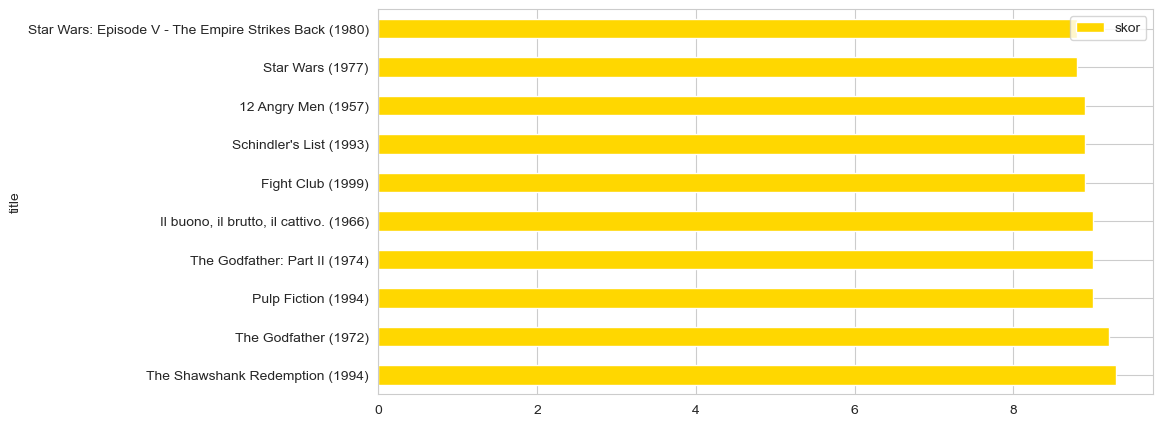

In [327]:
#Bu metriği kullanarak en iyi filmleri sıralayalım.
df_film = df_film.sort_values('skor', ascending=False)
df_film[['title',  'skor']].head(10)

#İlk 10 filmi yazdıralım.
df_film[['title',  'skor']].head(10).plot(x='title', y='skor', kind='barh', figsize=(10, 5), color='gold')


**BONUS: WordCloud**

Başlıklarda en çok kullanılan kelimeler. Love, Man, Day, Le, La, Night, II, Story...

In [328]:

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


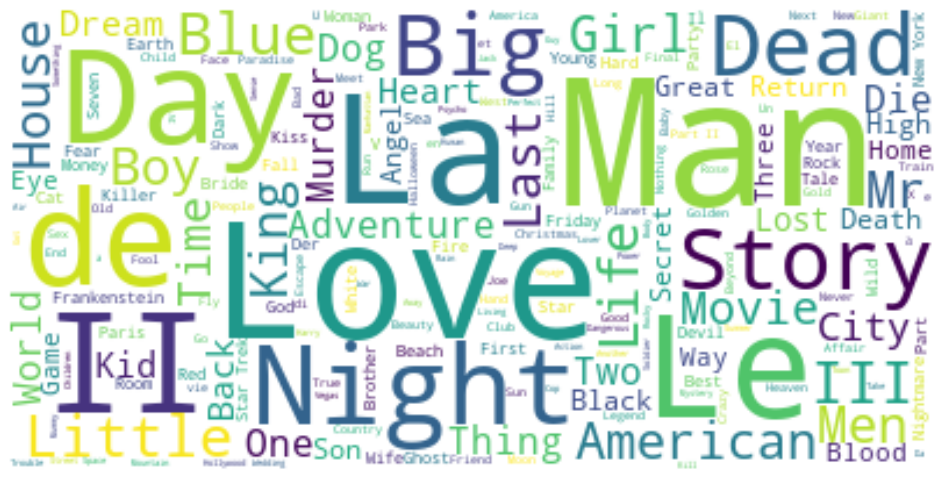

In [329]:
text = " ".join(i for i in film.baslik)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10), dpi= 80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

En çok film üreten ilk 10 şirket:


<AxesSubplot:>

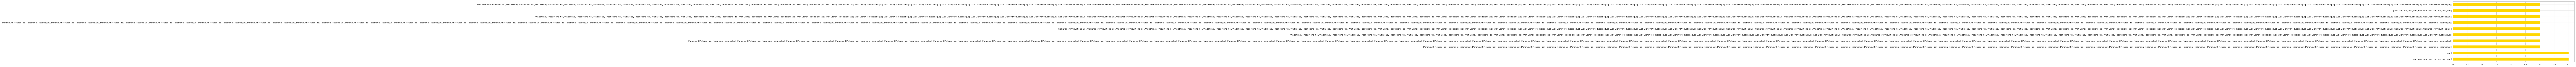

In [330]:
film2 = film.copy()

film2['sirket_adi'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='gold')


<AxesSubplot:>

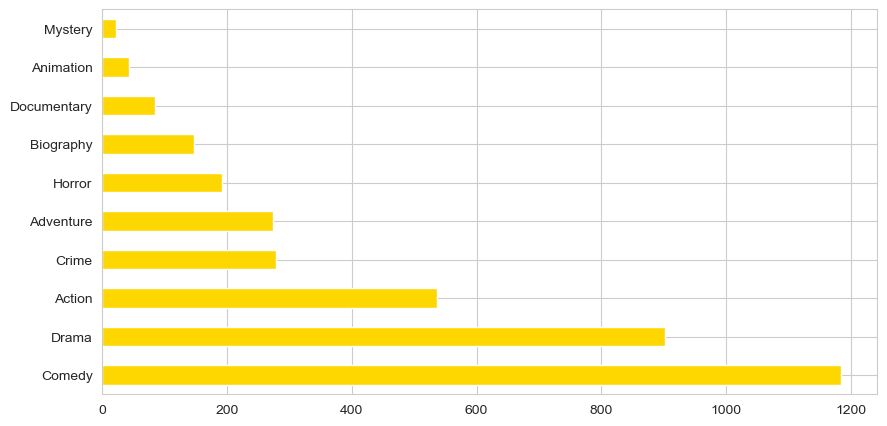

In [331]:
film2['tur'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='gold')

In [332]:
#En çok dil seçeneği olan, en yüksek metrikli fimlerin türlerini görelim.
df_film[['title', 'skor', 'language']].sort_values('skor', ascending=False).head(3)

,title,skor,language
movieid,,,
2477653,The Shawshank Redemption (1994),9.299977,"[English, English, English, English, English, ..."
2437277,The Godfather (1972),9.199969,"[English, English, English, English, English, ..."
2280997,Pulp Fiction (1994),8.999974,"[English, English, English, English, English, ..."


In [333]:
#Oy sayısı 1000'den fazla ve puanı 8.0'den fazla olan filmleri görelim.
film2['oy_sayisi'] = film2['oy_sayisi'].astype(int)
film2[(film2['oy_sayisi'] > 1000) & (film2['puan'] > 8.0)].sort_values('oy_sayisi', ascending=False).head(3)

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,distribution,temiz_baslik
movieid,,,,,,,,,,,,
2477653,The Shawshank Redemption (1994),USA,Crime,"[42079.0, 122073.0, 122959.0, 163204.0, 183897...","[English, English, English, English, English, ...",9.3,998823,1994,47.0,"[Castle Rock Entertainment [us] - (presents), ...",0000000125,The Shawshank Redemption 1994
2280997,Pulp Fiction (1994),USA,Crime,"[29449.0, 29449.0, 29449.0, 125172.0, 125172.0...","[English, English, English, English, English, ...",9.0,775943,1994,26.0,"[A Band Apart [us], Jersey Films [us], Miramax...",0000000124,Pulp Fiction 1994
1936800,Fight Club (1999),Germany,Drama,"[45764.0, 45764.0, 45764.0, 45764.0, 45764.0, ...","[English, English, English, English, English, ...",8.9,759494,1999,7.0,"[Atman Entertainment, Fox 2000 Pictures [us] -...",0000000124,Fight Club 1999


In [334]:
#En az oy alan en düşük puanlı 3 filmi görelim.
film2[(film2['oy_sayisi'] < 1000) & (film2['puan'] < 3.0)].sort_values('oy_sayisi', ascending=False).tail(3)

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,distribution,temiz_baslik
movieid,,,,,,,,,,,,
2000130,Hillbillys in a Haunted House (1967),USA,Comedy,"[102637.0, 104667.0, 177733.0, 247137.0, 26867...","[English, English, English, English, English, ...",1.8,493,1967,15.0,"[Woolner Brothers Pictures Inc. [us], Woolner ...",5100000000,Hillbillys in a Haunted House 1967
2254219,Penitentiary II (1982),USA,Drama,"[45089.0, 45089.0, 72195.0, 72195.0, 135388.0,...","[English, English, English, English, English, ...",2.7,310,1982,47.0,"[Bob-Bea Productions [us], Ideal Films [us], B...",2111000001,Penitentiary II 1982
2353900,Slaughterhouse Rock (1988),USA,Horror,"[135675.0, 262031.0, 357207.0, 402629.0, 40655...","[English, English, English, English, English, ...",2.7,309,1988,16.0,"[Arista Films, Arista Films, Arista Films, Ari...",2111000001,Slaughterhouse Rock 1988


In [335]:
dist = film2['distribution'].value_counts().head(10)
dist

0000122100    398
0000012211    343
             ... 
0000013200     85
0000012210     79
Name: distribution, Length: 10, dtype: int64

In [336]:
#2010'dan sonra yapılan 7 ile 8 arasında puan ve 10'den fazla oy alan filmleri görelim.
film2.loc[(film2['yil'] > 2010) & (film2['puan'] > 7.0) & (film2['puan'] < 8.0) & (film2['oy_sayisi'] > 10)].sort_values('oy_sayisi', ascending=False)


,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,distribution,temiz_baslik
movieid,,,,,,,,,,,,


In [337]:
#Böyle bir film yokmuş. O zaman 2010'dan önce yapılan 7 ile 8 arasında puan ve 100'den fazla oy alan filmleri görelim.
film2.loc[(film2['yil'] < 2010) & (film2['puan'] > 7.0) & (film2['puan'] < 8.0) & (film2['oy_sayisi'] > 100)].sort_values('oy_sayisi', ascending=False)

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,distribution,temiz_baslik
movieid,,,,,,,,,,,,
2504469,Titanic (1997),USA,Drama,"[3733.0, 3733.0, 3733.0, 10957.0, 10957.0, 109...","[English, English, English, English, English, ...",7.6,481534,1997,13.0,"[Lightstorm Entertainment [us], Paramount Pict...",0000001212,Titanic 1997
2577314,X-Men (2000),USA,Action,"[65940.0, 65940.0, 65940.0, 65940.0, 65940.0, ...","[English, English, English, English, English, ...",7.4,258326,2000,29.0,"[Bad Hat Harry Productions [us], Donners' Comp...",0000013310,X Men 2000
...,...,...,...,...,...,...,...,...,...,...,...,...
2451386,The Line King: The Al Hirschfeld Story (1996),USA,Biography,"[485168.0, 485168.0, 485168.0, 594856.0, 59485...","[English, English, English, English, English, ...",7.2,139,1996,0.0,"[Castle Hill Productions [us], New York Times ...",0000001301,The Line King The Al Hirschfeld Story 1996
2174392,Mille bolle blu (1993),Italy,Comedy,"[56687.0, 56691.0, 142044.0, 142062.0, 142091....","[Italian, Italian, Italian, Italian, Italian, ...",7.1,123,1993,38.0,"[Sorpasso Film [it], Sorpasso Film [it], Sorpa...",0..0012110,Mille bolle blu 1993


2010 sonrası film var
1


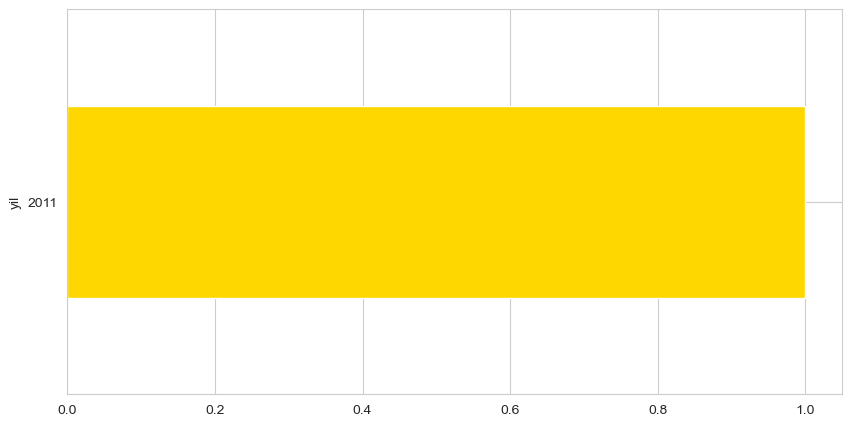

In [338]:
#2010 sonrası kaç film olduğunu görelim.
if len(film2[film2['yil'] > 2010]) == 0:
    print('2010 sonrası film yok')
else:
    print('2010 sonrası film var')
    #Sayıyı görelim
    print(film2[film2['yil'] > 2010].shape[0])
    film2[film2['yil'] > 2010].groupby('yil').count()['baslik'].plot(kind='barh', figsize=(10, 5), color='gold')
    


2011 yılında ait yalnızca 1 veri var. Dolayısıyla bu veri seti için eski filmleri içeren bir set dememiz mümkündür.

[]

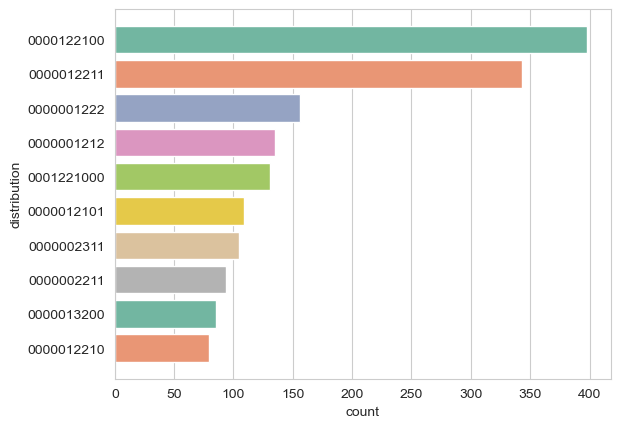

In [339]:
sns.countplot(y='distribution', data=film2, order=dist.index, palette='Set2')
plt.plot()

<AxesSubplot:xlabel='count', ylabel='tur'>

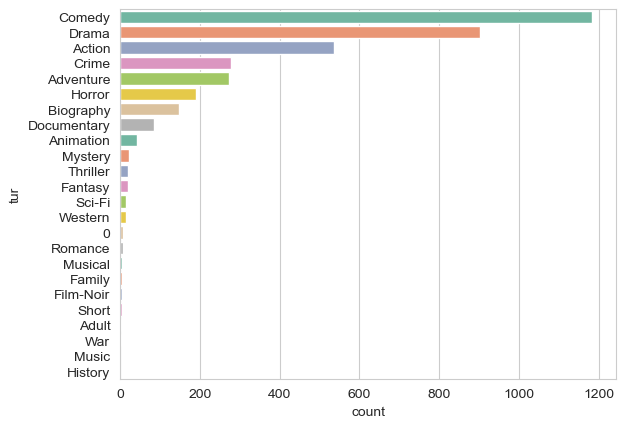

In [340]:
sns.countplot(y='tur', data=film2, order=film2['tur'].value_counts().index, palette='Set2')

In [341]:
#Kaç başrol oyuncusu var?

In [342]:

df6.leading.loc[df6.leading == True].count()
    

3705

3705 tane başrol oyuncusu var.

-------------------------------------------------


                                          İlginiz için teşekkür ederim!